# AML Term Project : Predicts Adults Income

## Importing libraries and reading data

In [ ]:
#Installations
!pip install fancyimpute
!pip install category_encoders
!pip install imbalanced-learn
!pip install imblearn
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import sklearn.metrics
import category_encoders
import random
from scipy.stats import chi2_contingency
from google.colab import drive
from fancyimpute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from collections import Counter
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn import preprocessing
from scipy import stats
from scipy.stats import boxcox
from sklearn import svm
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, KFold
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import euclidean_distances
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/AML/adult_data.csv')
df_test=pd.read_csv('/content/drive/MyDrive/AML/adult_test.csv')

In [ ]:
#Then, we join the training and test datasets
frames= [df_train, df_test]
df=pd.concat(frames)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


## Overview of the data

- age : the age of an individual 
- workclass : a term to represent the employment status of an individual 
- fnlwgt : the final weight, this is the number of people the census believes the entry represents 
- education : the highest level of education achieved 
- education-num : an id given to a given highest level of education achieved 
- marital-status : the marital status of an individual 
- occupation : the general type of occupation of an individual (work) 
- relationship : a representation of what this individual is relative to others 
- race : a description of an individual’s race 
- sex : the biological sex of the individual either male or female 
- capital-gain : the capital gains for an individual 
- capital-loss : the capital loss for an individual 
- hours-per-week : the hours an individual has reported to work per week continuous 
- native-country : the country of origin for an individual 
- salary : the information that whether or not an individual makes more than $50,000 annually 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1    workclass       48842 non-null  object
 2    fnlwgt          48842 non-null  int64 
 3    education       48842 non-null  object
 4    education-num   48842 non-null  int64 
 5    marital-status  48842 non-null  object
 6    occupation      48842 non-null  object
 7    relationship    48842 non-null  object
 8    race            48842 non-null  object
 9    sex             48842 non-null  object
 10   capital-gain    48842 non-null  int64 
 11   capital-loss    48842 non-null  int64 
 12   hours-per-week  48842 non-null  int64 
 13   native-country  48842 non-null  object
 14   salary          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Cleaning Data

### Deleting the space before each string / Standardizing

In [ ]:
#Standardizing columns names
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary'],
      dtype='object')

In [ ]:
newcolumns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary']
df.columns = newcolumns

In [ ]:
#Standardizing values occuring in each columns as well 
obj_cols = df.select_dtypes(include=[np.object]).columns

for col in obj_cols:
    df[col] = df[col].apply(lambda x: x.strip())

<ipython-input-11-014b15f4dbca>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  obj_cols = df.select_dtypes(include=[np.object]).columns


###Duplicates

Having duplicates in the data frame can be an issue as one information (one row) is repeated one or multiple times ; it changes statistical parameters like mean, standard deviation, ... <br>
To this end, we should delete them.

In [ ]:
#Counting how many duplicates are in the data frame
df.duplicated().sum()

29

In [ ]:
#Droping the duplicates
df.drop_duplicates(inplace=True)

### Deleting useless columns

As we want to predict the salary, we want to avoid having the same information in more than one column because it could change the weight of one feature on the model we define. For instance, here the two columns : education and education-num have literally the same information. Then, we delete the column education-num to keep the information once. <br>
Another issue could be the relationship column as it can echo the marital-status column a lot. <br> 

In [ ]:
#Deleting education-num column
df.drop(['education-num'],axis=1,inplace=True)

Now, we are going to study the relationship column to see if it correlates to much with the marital-status and therefore if it needs to be remove from the data frame. 

In [ ]:
#Cross-table relationship and marital-status columns
Cross_tab=pd.crosstab(index=df['relationship'],columns=df['marital-status'])
Cross_tab

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
relationship,,,,,,,
Husband,0,12,19697,0,0,0,0
Not-in-family,3626,0,23,330,7100,637,851
Other-relative,181,1,201,54,920,79,70
Own-child,455,1,143,61,6745,146,25
Unmarried,2368,0,0,183,1333,668,572
Wife,0,23,2308,0,0,0,0


With this table, we can see that there is a strong correlation between the two variables so we can drop the relationship column as well.

In [ ]:
#Deleting relationship column
df.drop(['relationship'],axis=1,inplace=True)

To finish, we can test the correlation between other variables of the dataframe.

In [ ]:
#Let's see the correlation between the different numerical variables in the dataset
df.corr()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076474,0.077221,0.056908,0.071322
fnlwgt,-0.076474,1.000000,-0.003713,-0.004375,-0.013516
capital-gain,0.077221,-0.003713,1.000000,-0.031460,0.082154
capital-loss,0.056908,-0.004375,-0.031460,1.000000,0.054440
hours-per-week,0.071322,-0.013516,0.082154,0.054440,1.000000


As we can see, we don't have strong correlation between the different numerical variables (abs(coefficient of correlation) < 0.1) so, we don't have repetitive information among these variables.

Then, we should also pay attention to columns which aren't useful for our future analysis. This is the case for the 'fnlwgt' column. Indeed, it represents a weight assigned by the US census bureau to each row. The literal meaning is that you will need to replicate each row, final weight times to get the full data. So, this information has nothing to do with the salary. 

In [ ]:
#Deleting fnlwgt column
df.drop(['fnlwgt'],axis=1,inplace=True)

### NaN values

Having NaN values is going to be a problem when we will build a machine learning model. We have to study them.

In [ ]:
#Checking if there are any NaN values
df.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

After checking, we don't have any NaN values ; but we want to make sure they are not appearing in a different way so it would be interesting to check all values occuring for each column. 

In [ ]:
#Checking all occuring values in each column
for col in df:
  print(col,np.unique(df[col]))

age [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 90]
workclass ['?' 'Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc'
 'Self-emp-not-inc' 'State-gov' 'Without-pay']
education ['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college']
marital-status ['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed']
occupation ['?' 'Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving']
race ['Amer-Indian-Eskimo' 'Asian-Pac-Islander' 'Black' 'Other' 'White']
sex

As we can see, we have the value '?' in 3 columns: <br>
- workclass
- occupation
- native-country <br>
which represents a NaN value.

In [ ]:
#First, we replace "?" by NaN values
df=df.replace('?',np.nan)

In [ ]:
#Checking if there are any NaN values (as we are supposed to now)
print('number of NaN values')
print(df.isnull().sum()) #number
print('percentage of NaN values')
print((df.isnull().sum()/df.size)*100) #percentage

number of NaN values
age                  0
workclass         2799
education            0
marital-status       0
occupation        2809
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     856
salary               0
dtype: int64
percentage of NaN values
age               0.000000
workclass         0.477844
education         0.000000
marital-status    0.000000
occupation        0.479551
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.146136
salary            0.000000
dtype: float64


We now have NaN values, even though the percentage is quite small (the biggest only represent 0.41%). However, there is a high probability that this percentage increases as we are going to deal with further steps in the cleaning (like outliers for instance). To this end, we will decide how to deal with NaN values later in the cleaning.

### Outliers

We only have 4 numerical columns: <br>
- age
- capital-gain
- capital-loss
- hours-per-week <br>
We will study each of them to find potential outliers. First, let's have a visualization of these variables to have an idea of their distribution.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb746fe5e0>,
      dtype=object)

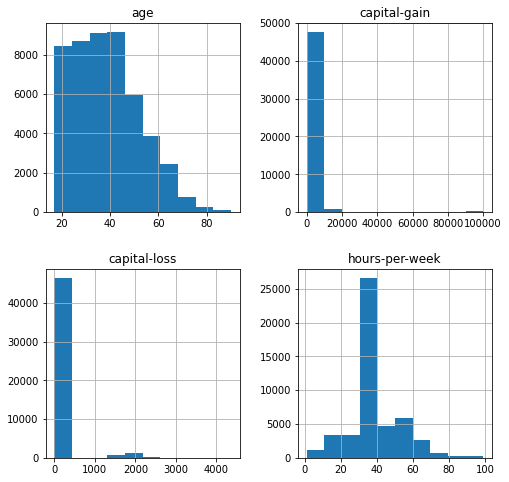

In [ ]:
#Histograms for each numerical variable
df.hist(figsize=(8,8))

After observing these histograms and all the occuring values for each column, we can already exclude the column age. Indeed, it seems to have coherent values (age going from 17 to 99) and well distributed as we can see on the histogram. <br>


In [ ]:
# Computation of outliers
def outliers(column):
  """
  function computing outliers for a given column of a data frame
  """
  Q1=column.quantile(0.25)
  Q3 = column.quantile(0.75)
  IQR = Q3 - Q1
  print("Q1 is", Q1, "and Q3 is", Q3)
  small_mild_outliers = column < (Q1 - 1.5 * IQR) 
  big_mild_outliers = column > (Q3 + 1.5 * IQR)
  small_severe_outliers = column < (Q1 - 3 * IQR) 
  big_severe_outliers = column > (Q3 + 3 * IQR)
  return sum(small_mild_outliers), sum(big_mild_outliers), sum(small_severe_outliers), sum(big_severe_outliers)

In [ ]:
#Applying the outliers function to the 3 remaining numerical columns of the data frame
col=['capital-gain','capital-loss','hours-per-week']
for i in col:
  print(i)
  print(outliers(df[i]))

capital-gain
Q1 is 0.0 and Q3 is 0.0
(0, 4035, 0, 4035)
capital-loss
Q1 is 0.0 and Q3 is 0.0
(0, 2282, 0, 2282)
hours-per-week
Q1 is 40.0 and Q3 is 45.0
(8280, 5209, 4950, 1676)


We can see that for capital-gain and capital-loss, we have many values at 0 which make the Q1 and Q3 equal to 0. To this end, every value higher than 0 is considered a strong outlier. However, these values still make sense in our study so we will study outliers differently for these two columns.

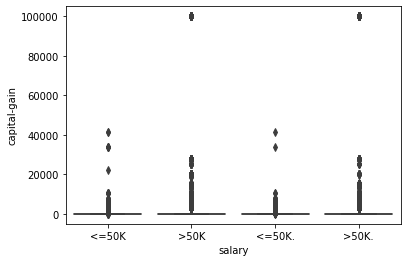

In [ ]:
#Boxplot of capital-gain 
sns.boxplot(y = df['capital-gain'], x = df.salary)

We can clearly see outliers value in the graph above, let's see how many values it represents in the dataframe. Also, we are going to group the salary data in a next step of the cleaning to only obtain 2 categories.

In [ ]:
#Counting how many time each capital-gain appears in the dataframe (especially looking at the outlier)
df['capital-gain'].value_counts().sort_index(ascending=False)

99999      244
41310        3
34095        6
27828       58
25236       14
         ...  
914         10
594         52
401          5
114          8
0        44778
Name: capital-gain, Length: 123, dtype: int64

We have 244 times the value 99999, which is clearly an outlier. The other values doesn't seem to be outliers.

In [ ]:
#Replace 99999 by NaN 
df['capital-gain']=df['capital-gain'].replace(99999,np.nan)

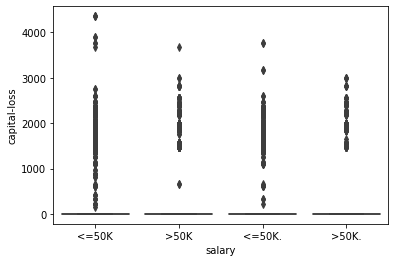

In [ ]:
#Same for capital-loss
sns.boxplot(y = df['capital-loss'], x = df.salary)

In [ ]:
df['capital-loss'].value_counts().sort_index(ascending=False)

4356        3
3900        2
3770        4
3683        2
3175        2
        ...  
419         3
323         5
213         5
155         1
0       46531
Name: capital-loss, Length: 99, dtype: int64

It seems that we don't have any outliers looking at the boxplot and each value of the column capital-loss.

Now, let's take a look at the last column, the hours of work per week. Looking at the histogram it seems that a majority of values are gathered between 30/50 hours ; this fact is confirm when we observe the outliers. Indeed, Q1 and Q3 are really close (40 and 45 repectively). According to the outliers function we have a lot of severe outliers ; we will have a further analyze to confirm or not this fact.

In [ ]:
#Check profession of people working more than 70h (is it logical ?)
df[df['hours-per-week']>70]['occupation'].value_counts()

Farming-fishing      126
Prof-specialty       115
Exec-managerial       99
Transport-moving      82
Sales                 79
Craft-repair          66
Other-service         62
Protective-serv       34
Adm-clerical          20
Tech-support          19
Handlers-cleaners     13
Machine-op-inspct     12
Priv-house-serv        7
Name: occupation, dtype: int64

In [ ]:
#Do we have rows where the number of work per week is higher than 168h ?
df[df['hours-per-week']>168].size

0

First, we don't have profession where the number of hours of work per week is higher than 168 (the number of hours in one week 7*24=168) so no major outliers. <br>
Then, we observed the profession where the number of hours is higher than 70 (10 hours per day, working 7 days) to see if they were coherent.  <br>
We can conclude that there is no outliers for this column.

In [ ]:
#Checking the NaN Values
df.isnull().sum()

age                  0
workclass         2799
education            0
marital-status       0
occupation        2809
race                 0
sex                  0
capital-gain       244
capital-loss         0
hours-per-week       0
native-country     856
salary               0
dtype: int64

After the outliers work, we have more NaN values in the data frame.

### Replacing NaN values

In [ ]:
#Displaying NaN values
df.isnull().sum()

age                  0
workclass         2799
education            0
marital-status       0
occupation        2809
race                 0
sex                  0
capital-gain       244
capital-loss         0
hours-per-week       0
native-country     856
salary               0
dtype: int64

In [ ]:
df.dtypes

age                 int64
workclass          object
education          object
marital-status     object
occupation         object
race               object
sex                object
capital-gain      float64
capital-loss        int64
hours-per-week      int64
native-country     object
salary             object
dtype: object

We define X, the numerical colums of df

In [ ]:
X=df[['age', 'capital-gain', 'capital-loss', 'hours-per-week']]
X

,age,capital-gain,capital-loss,hours-per-week
0,39,2174.0,0,40
1,50,0.0,0,13
2,38,0.0,0,40
3,53,0.0,0,40
4,28,0.0,0,40
...,...,...,...,...
16276,39,0.0,0,36
16277,64,0.0,0,40
16278,38,0.0,0,50
16279,44,5455.0,0,40


In [ ]:
#We use the mice_imputer 
mice_imputer=IterativeImputer()
df_imputed=mice_imputer.fit_transform(X)

In [ ]:
X_imputed=pd.DataFrame(df_imputed, columns=X.columns)

In [ ]:
X_imputed.isnull().sum()

age               0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

In [ ]:
#We replace the Nan values in the column capital-gain
df['capital-gain']=X_imputed['capital-gain']

In [ ]:
#Displaying NaN values after the replacement of X
df.isnull().sum()

age                  0
workclass         2799
education            0
marital-status       0
occupation        2809
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     856
salary               0
dtype: int64

For the categorical columns, we are going to drop them as we don't have a high percentage of them in the data set (so we don't loose many information).

In [ ]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [ ]:
df.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [ ]:
df.shape

(45194, 12)

### Harmonizing and grouping data

In [ ]:
#Fonction to plot piechart
def piechart(col):
  fig, ax = plt.subplots(figsize = (5,5))
  fig.patch.set_facecolor('white')
  values = df[col].value_counts().to_dict()

  palette_color = sns.color_palette('bright')
    
  plt.pie(list(values.values()), labels=list(values.keys()) , colors=palette_color, autopct='%.0f%%')
  plt.show()

#### Age

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb70c45ca0>]],
      dtype=object)

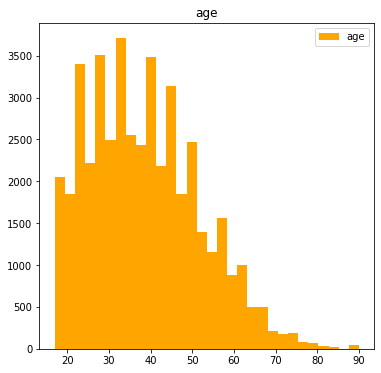

In [ ]:
#Plot of the distribution of the ages
df.hist(column='age', grid=False, figsize=(6,6), legend=True, bins=30, color='#FFA500')

In [ ]:
#Defining three categories 
print(df.age.unique())
print(df.age.describe())

def get_group_age(x):
    if x <= 30:
        return 'young'
    if x > 30 and x <= 60:
        return 'adult'
    if x > 60:
        return 'old'

#Applying the function 
df['cat_age'] = df.age.apply(lambda x : get_group_age(x)) #adding another column
print(df.cat_age.unique())
print(df['age'].value_counts())

[39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86
 89 87]
count    45194.000000
mean        38.551755
std         13.215806
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64
['adult' 'young' 'old']
36    1283
33    1279
31    1274
35    1271
23    1240
      ... 
88       5
85       5
86       1
89       1
87       1
Name: age, Length: 74, dtype: int64


#### Education

In [ ]:
#Checking how many rows we have for each education
df['education'].value_counts().sort_values(ascending=False)

HS-grad         14777
Some-college     9890
Bachelors        7565
Masters          2513
Assoc-voc        1958
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           822
Prof-school       785
9th               676
12th              576
Doctorate         544
5th-6th           448
1st-4th           220
Preschool          71
Name: education, dtype: int64

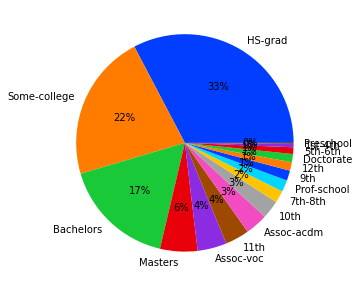

In [ ]:
piechart('education')

In [ ]:
#Fonction to regroup value of the education column
def edureplacement(col):
  if col=='Preschool':
    return 'Before HS'
  if col=='HS-grad':
    return 'HS graduation'
  if (col=='Bachelors') | (col=='Some-college'):
    return 'After HS +'
  else:
    return 'After HS ++'


In [ ]:
#Applying the function to the education column
df['cat_education']=df['education'].apply(edureplacement)

#### Marital Status

In [ ]:
#Checking how many rows we have for each marital status
df['marital-status'].value_counts().sort_values(ascending=False)

Married-civ-spouse       21048
Never-married            14580
Divorced                  6294
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: marital-status, dtype: int64

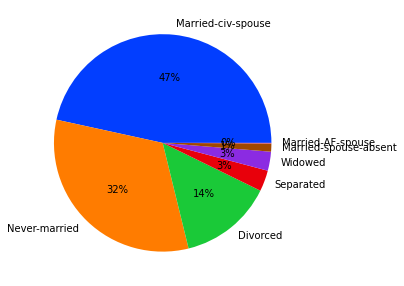

In [ ]:
piechart('marital-status')

In [ ]:
#Fonction to regroup value of the marital-status column
def maritalreplacement(col):
  if col=='Divorced':
    return 'Divorced'
  if (col=='Married-civ-spouse') | (col=='Married-AF-spouse') :
    return 'Married'
  else:
    return 'Other'

In [ ]:
#Applying the function to the marital-status column
df['cat_marital-status']=df['marital-status'].apply(maritalreplacement)

#### Sex


In [ ]:
#Transform sex column to numeric (boolean, 1 or 0)
df.loc[(df['sex']=='Female'),'sex'] = 1
df.loc[(df['sex']=='Male'),'sex'] = 0

#### Native country

In [ ]:
#Checking how many rows we have for each country
df['native-country'].value_counts().sort_values(ascending=False)

United-States                 41270
Mexico                          899
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        84
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

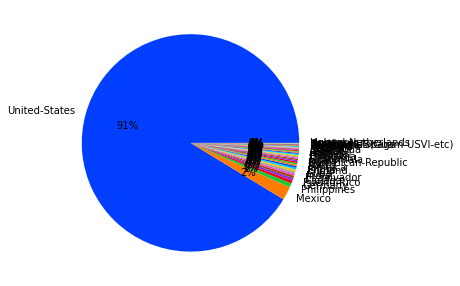

In [ ]:
piechart('native-country')

As we have a large majority of native-country being United States (almost 90%), we can regroup all the other country together and divided the column into two values: either from US or not from US.

In [ ]:
#Fonction to regroup value of the native-country column into 'us' and 'not us' (without forgetting about '?' symbol)
def countryreplacement(col):
  if col=='United-States':
    return 'US'
  else:
    return 'Not US'

In [ ]:
df['cat_native-country']=df['native-country'].apply(countryreplacement)

#### Salary

In [ ]:
#Gather value and transform salary column to numeric (boolean, 1 or 0)
df.loc[(df['salary']=='>50K.'),'salary'] = 1
df.loc[(df['salary']=='>50K'),'salary'] = 1
df.loc[(df['salary']=='<=50K.'),'salary'] = 0
df.loc[(df['salary']=='<=50K'),'salary'] = 0

#### Capital-gain

In [ ]:
#We group the capital gain
def group_capital_gain(col):
  if col==0:
    return '0'
  else:
    return 'greater_than_0'

In [ ]:
#Applying the function
df['cat_capital-gain']=df['capital-gain'].apply(group_capital_gain)
df['cat_capital-gain'].unique()

array(['greater_than_0', '0'], dtype=object)

#### Capital-*loss*

In [ ]:
#Same for the capital loss
def group_capital_loss(col):
  if col==0:
    return '0'
  else:
    return 'greater_than_0'

In [ ]:
#Applying the function
df['cat_capital-loss']=df['capital-loss'].apply(group_capital_loss)
df['cat_capital-loss'].unique()

array(['0', 'greater_than_0'], dtype=object)

#### Hours-per-week

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb6e93a7c0>]],
      dtype=object)

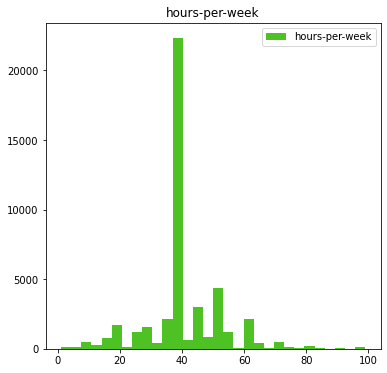

In [ ]:
#Plot of the distribution of hours per week
df.hist(column='hours-per-week', grid=False, figsize=(6,6), legend=True, bins=30, color='#4ec124')

In [ ]:
#We choose group in three categories the hours of work per week
def group_hours_per_week(col):
  if col<30:
    return '<30'
  if col>=30 and col<=60:
    return '30-60'
  else:
    return '>60'

In [ ]:
#Applying the function 
df['cat_hours-per-week']=df['hours-per-week'].apply(group_hours_per_week)
df['cat_hours-per-week'].unique()

array(['30-60', '<30', '>60'], dtype=object)

## Exploratory

In [ ]:
df.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'salary', 'cat_age', 'cat_education',
       'cat_marital-status', 'cat_native-country', 'cat_capital-gain',
       'cat_capital-loss', 'cat_hours-per-week'],
      dtype='object')

Let's see the correlation between the different features and the salary. We will start with categorical variables.

In [ ]:
sns.set(style="darkgrid")

def correlation_by_value(regretion_column, independent_column):
  fig_dims= (15, 8)
  fig, ax = plt.subplots(figsize=fig_dims)
  df_plot= df[[regretion_column, independent_column]]
  df_plot.groupby(regretion_column)
  df_plot= df_plot.value_counts().to_frame('occurences').reset_index()
  corr_by_value_plot= sns.barplot(x=regretion_column, y="occurences", palette = 'hls', hue=independent_column, data=df_plot).set(title=regretion_column)

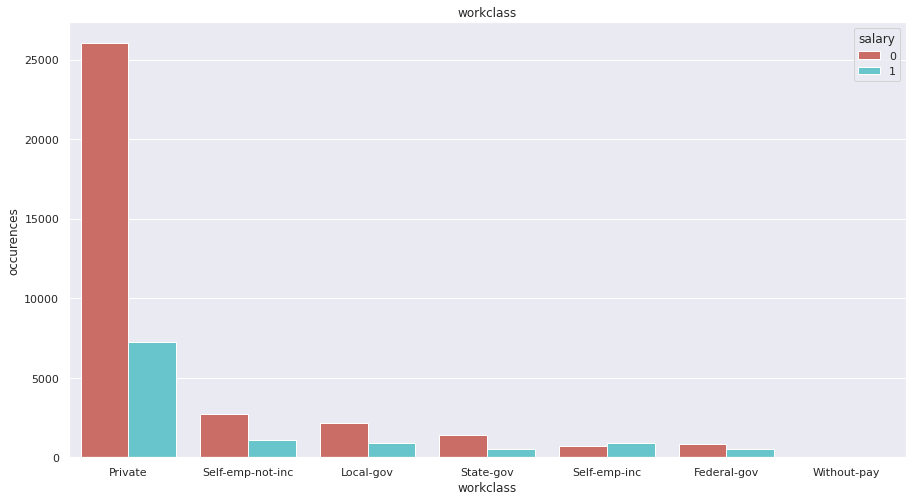

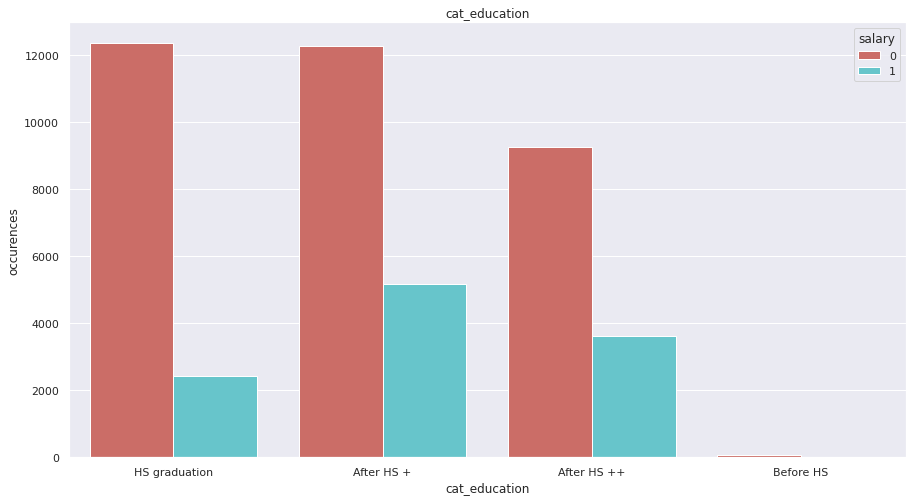

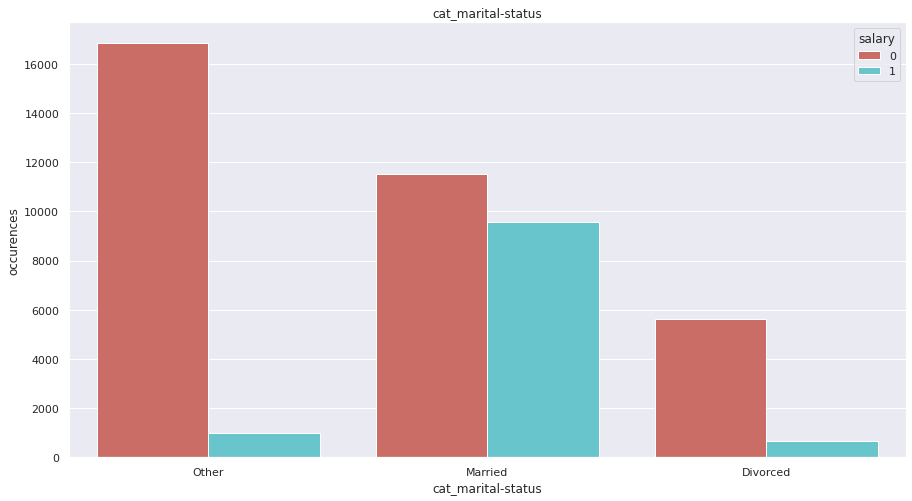

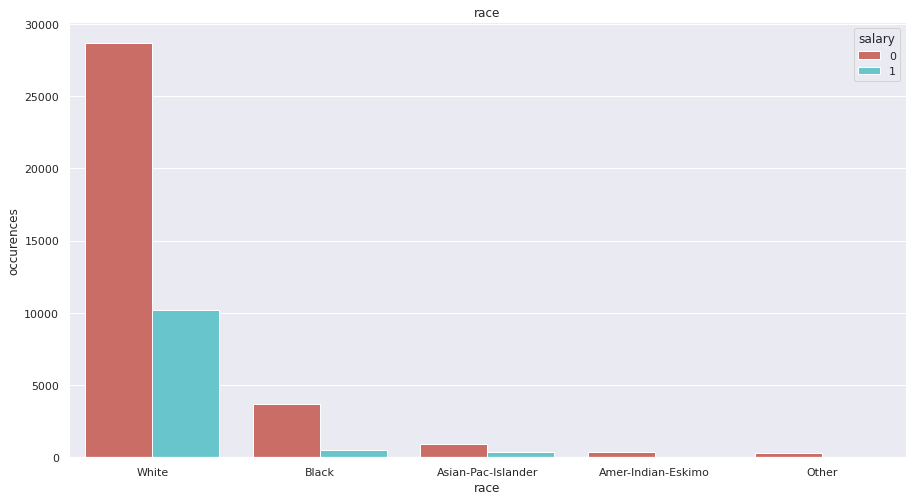

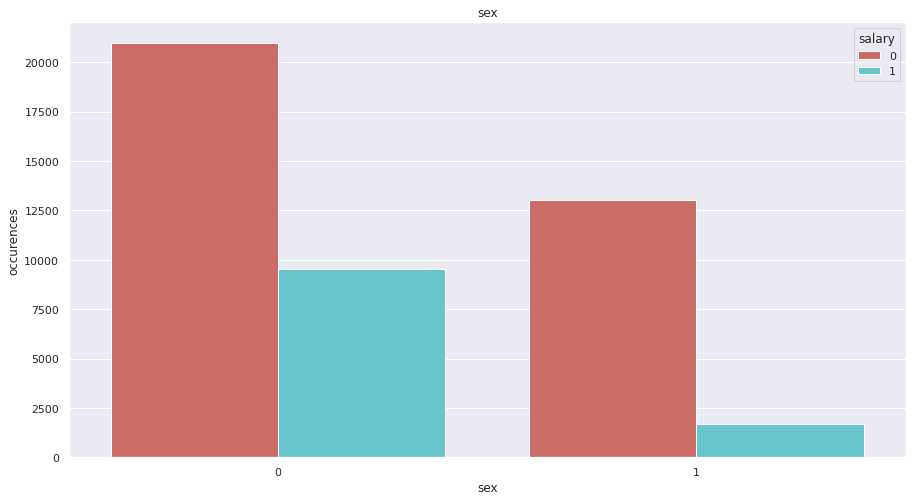

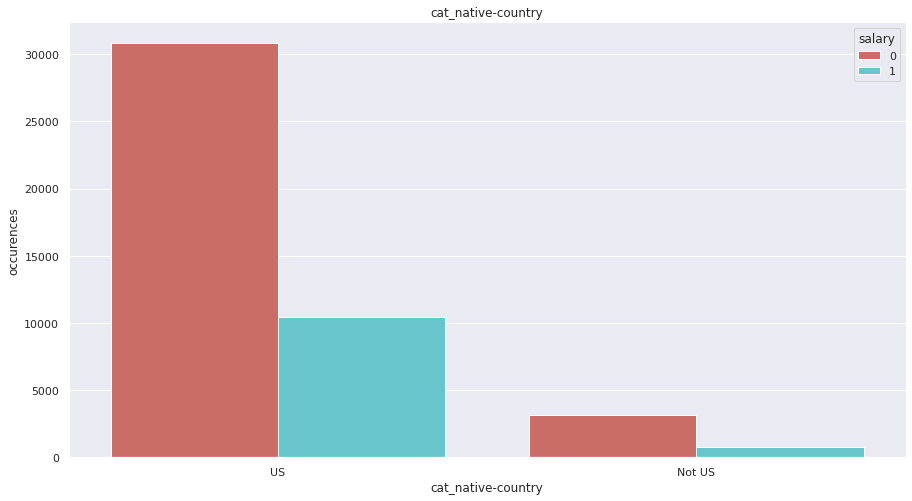

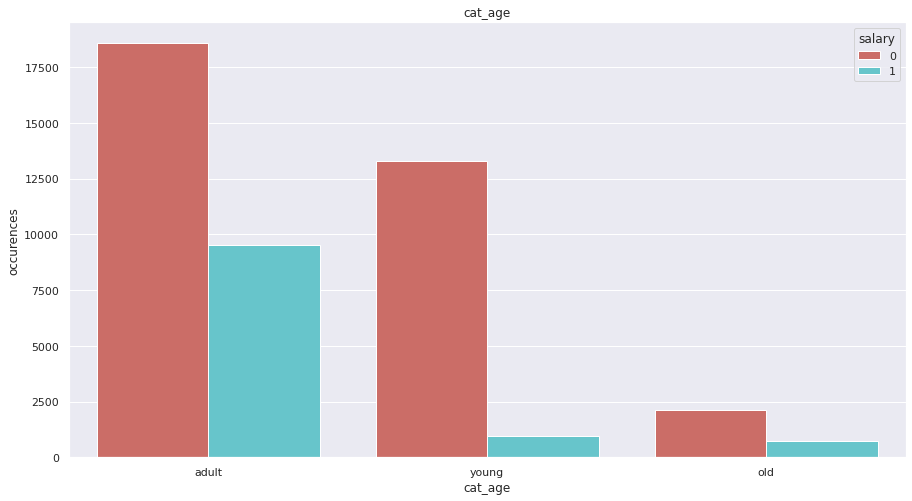

In [ ]:
col=['workclass', 'cat_education', 'cat_marital-status', 'race',
       'sex', 'cat_native-country', 'cat_age']
for i in col:
  correlation_by_value(i, "salary")

In [ ]:
#Distribution of salary in the dataframe
print('<50K:', len(df['salary'][df['salary']==0])/len(df['salary']), '>50K:',len(df['salary'][df['salary']==1])/len(df['salary']))

<50K: 0.752046731867062 >50K: 0.247953268132938


In the data set, we have approximately 75% of salary under 50K and 25% superior to 50K. We will see if we have the same distribution for each variable in the columns.

In [ ]:
#Percentage of high and low salary for each value occuring in the column
def crossing_tables(col):
  Cross_tab=pd.crosstab (index=col, columns=df['salary'], normalize='index')
  Cross_tab.rename(columns = {0:'<50K', 1:'>50K'}, inplace = True)
  return Cross_tab

for i in col :
   display(crossing_tables(df[i]))


salary,<50K,>50K
workclass,,
Federal-gov,0.609531,0.390469
Local-gov,0.704839,0.295161
Private,0.782188,0.217812
Self-emp-inc,0.445593,0.554407
Self-emp-not-inc,0.720949,0.279051
State-gov,0.732785,0.267215
Without-pay,0.904762,0.095238


salary,<50K,>50K
cat_education,,
After HS +,0.703982,0.296018
After HS ++,0.718951,0.281049
Before HS,0.985915,0.014085
HS graduation,0.836570,0.163430


salary,<50K,>50K
cat_marital-status,,
Divorced,0.895933,0.104067
Married,0.545731,0.454269
Other,0.945286,0.054714


salary,<50K,>50K
race,,
Amer-Indian-Eskimo,0.878161,0.121839
Asian-Pac-Islander,0.716590,0.283410
Black,0.873669,0.126331
Other,0.872521,0.127479
White,0.737505,0.262495


salary,<50K,>50K
sex,,
0,0.687404,0.312596
1,0.886347,0.113653


salary,<50K,>50K
cat_native-country,,
Not US,0.806320,0.193680
US,0.746886,0.253114


salary,<50K,>50K
cat_age,,
adult,0.660831,0.339169
old,0.750615,0.249385
young,0.932318,0.067682


It seems that some variable influence positively the salary. For instance, when the race is "Amer-indian_Eskimo", then we have 87% people with a salary under 50K (quite higher than the average 75%).In opposition when the person is white, we have less 75% of people with a salary under 50K.

Now, we are going to see the correlation with the numerical variables.

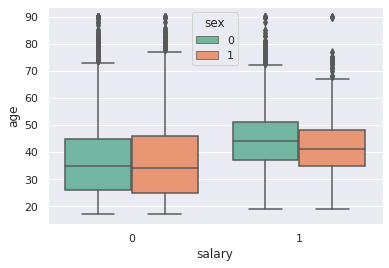

In [ ]:
sns.boxplot(x="salary", y="age", palette='Set2', hue="sex", data=df)
sns.set(rc={'figure.figsize':(15,8)})

It seems that younger people have more chances to earn less than 50K (the median is approximately at 35 for under 50K and at 42 for more than 50K).

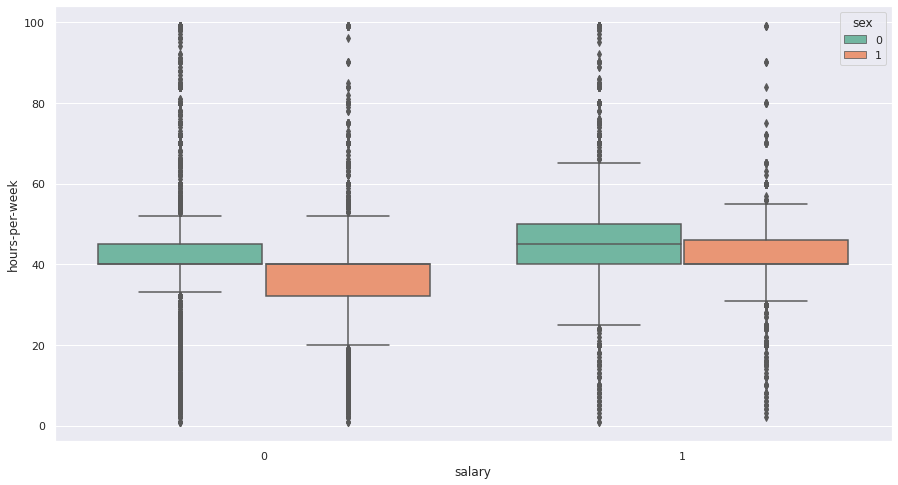

In [ ]:
sns.boxplot(x="salary", y="hours-per-week", palette='Set2', hue="sex", data=df)

## Cleaning before splitting

In [ ]:
#Changing the type of the columns sex and salary
df['sex']=df['sex'].astype(str).astype(int)
df['salary']=df['salary'].astype(str).astype(int)

### Normalizing

We will try three different approaches:
* Standarization: $\frac{X - \mu}{\sigma}$ will transform the data so it has mean 0 and std 1.
* Min-max scaling: $\frac{X - X_{min}}{X_{max} - X_{min}}$ will send the data to the range [0,1]
* Boxcox transformation: $\frac{X^\lambda - 1}{ \lambda}$ if $\lambda \neq 0$ or $ln(X)$ if $\lambda = 0$ transforms the data to try to fit a normal distribution. 

In [ ]:
#We will define another dataset adding the different normalized method
dfn = df
min_max_scaler =  preprocessing.MinMaxScaler()
dfn[['age_min_max', 'capital-gain_min_max', 'capital-loss_min_max', 'hours-per-week_min_max']] = min_max_scaler.fit_transform(dfn[['age', 'capital-gain', 'capital-loss', 'hours-per-week']])

std_scaler = preprocessing.StandardScaler()
dfn[['age_std','capital-gain_std', 'capital-loss_std', 'hours-per-week_std']]= preprocessing.scale(dfn[['age', 'capital-gain', 'capital-loss', 'hours-per-week']])

x, _= boxcox(dfn['age'])
dfn['age_bx'] = x

#can't be done because data must be positive
#x, _= boxcox(dfn['capital-gain'])
#dfn['capital-gain_bx'] = x

#x, _= boxcox(dfn['capital-loss'])
#dfn['capital-loss_bx'] = x

x, _= boxcox(dfn['hours-per-week'])
dfn['hours-per-week_bx'] = x

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb6ea492e0>,
      dtype=object)

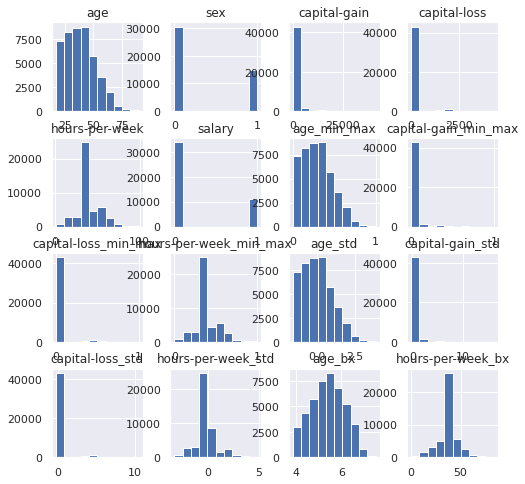

In [ ]:
#Histograms of age, sex, capital gain, capital loss and their different normalizations
dfn.hist(figsize=(8,8))

Comparing the histogram, we can see that the best normalization process was obtained through the boxcox method. However, this can't be applied to the capital loss and capital gain as we many zero values. 
We are going to work with this method but only for the age and hours per week. We won't take into account the standardization and min_max because the results are not convincing enough.

### Splitting dataframe : one with categeories, one without categories and one normalized

In [ ]:
df_cat=df[['workclass', 'occupation', 'race',
       'sex', 'cat_age', 'cat_education',
       'cat_marital-status', 'cat_native-country', 'cat_capital-loss', 'cat_capital-gain', 'salary']]

df_nocat=df[['age','workclass', 'education' , 'marital-status', 'occupation', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'salary']]

df_norm=dfn[['age_bx','workclass', 'education' , 'marital-status', 'occupation', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week_bx',
       'native-country', 'salary']]

### Encoding

#### Dummies

In [ ]:
#Dummies Encoder for df_cat and df_nocat
df_cat_dum=pd.get_dummies(df_cat,columns=['workclass','occupation','race','cat_age','cat_education','cat_marital-status','cat_native-country','cat_capital-gain','cat_capital-loss'],dtype='int')
df_nocat_dum=pd.get_dummies(df_nocat,columns=['workclass','education','marital-status','occupation','race','native-country'],dtype='int')
df_norm_dum=pd.get_dummies(df_norm,columns=['workclass','education','marital-status','occupation','race','native-country'],dtype='int')

#### Target Encoder

In [ ]:
#Target Encoder for df_cat
encoder=category_encoders.target_encoder.TargetEncoder()
encoder.fit(df_cat[['workclass','occupation','race','cat_age','cat_education','cat_marital-status','cat_native-country','cat_capital-gain','cat_capital-loss']],df_cat['salary'])

df_cat_targ=df_cat.join(encoder.transform(df_cat[['workclass','occupation','race','cat_age','cat_education','cat_marital-status','cat_native-country','cat_capital-gain','cat_capital-loss']]).add_suffix('_targ'))

In [ ]:
#Target Encoder for df_nocat
encoder=category_encoders.target_encoder.TargetEncoder()
encoder.fit(df_nocat[['workclass','education','marital-status','occupation','race','native-country']],df_nocat['salary'])

df_nocat_targ=df_nocat.join(encoder.transform(df_nocat[['workclass','education','marital-status','occupation','race','native-country']]).add_suffix('_targ'))

In [ ]:
#Target Encoder for df_norm
encoder=category_encoders.target_encoder.TargetEncoder()
encoder.fit(df_norm[['workclass','education','marital-status','occupation','race','native-country']],df_norm['salary'])

df_norm_targ=df_norm.join(encoder.transform(df_norm[['workclass','education','marital-status','occupation','race','native-country']]).add_suffix('_targ'))

In [ ]:
#Dropping the columns encoded (only keeping the target encoded version)
df_cat_targ.drop(['workclass','occupation','race','cat_age','cat_education','cat_marital-status','cat_native-country','cat_capital-gain','cat_capital-loss'],axis=1,inplace=True)
df_nocat_targ.drop(['workclass','education','marital-status','occupation','race','native-country'],axis=1,inplace=True)
df_norm_targ.drop(['workclass','education','marital-status','occupation','race','native-country'],axis=1,inplace=True)

### Undersampling

In [ ]:
#Undersampling cat dummies
rus = RandomUnderSampler(random_state=0)
X = df_cat_dum.drop("salary",axis=1)
y = df_cat_dum['salary']
random.seed(123)
X5, y5 = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y5))


Resampled dataset shape Counter({0: 11206, 1: 11206})


In [ ]:
#Undersampling no cat dummies
rus = RandomUnderSampler(random_state=0)
X = df_nocat_dum.drop("salary",axis=1)
y = df_nocat_dum['salary']
random.seed(123)
X6, y6 = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y))

Resampled dataset shape Counter({0: 33988, 1: 11206})


In [ ]:
#Undersampling cat targ
rus = RandomUnderSampler(random_state=0)
X = df_cat_targ.drop("salary",axis=1)
y = df_cat_targ['salary']
random.seed(123)
X7, y7 = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y7))

Resampled dataset shape Counter({0: 18081, 1: 18081})


In [ ]:
#Undersampling no cat targ
rus = RandomUnderSampler(random_state=0)
X = df_nocat_targ.drop("salary",axis=1)
y = df_nocat_targ['salary']
random.seed(123)
X8, y8 = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y8))

Resampled dataset shape Counter({0: 18081, 1: 18081})


In [ ]:
#Undersampling norm dum
rus = RandomUnderSampler(random_state=0)
X = df_norm_dum.drop("salary",axis=1)
y = df_norm_dum['salary']
random.seed(123)
X9, y9 = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y8))

Resampled dataset shape Counter({0: 18081, 1: 18081})


In [ ]:
#Undersampling norm targ
rus = RandomUnderSampler(random_state=0)
X = df_norm_targ.drop("salary",axis=1)
y = df_norm_targ['salary']
random.seed(123)
X10, y10 = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y8))

Resampled dataset shape Counter({0: 18081, 1: 18081})


## Train Test split and Learn Validation split

In [ ]:
#First model categories with dummies encoder
X1 = df_cat_dum.drop("salary",axis=1)
y1 = df_cat_dum['salary']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,test_size=0.25,random_state =123)
X1_learn, X1_val, y1_learn, y1_val = train_test_split(X1_train, y1_train,test_size=0.25,random_state =123)

In [ ]:
#Second model no categories with dummies encoder
X2 = df_nocat_dum.drop("salary",axis=1)
y2 = df_nocat_dum['salary']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2,test_size=0.25,random_state =123)
X2_learn, X2_val, y2_learn, y2_val = train_test_split(X2_train, y2_train,test_size=0.25,random_state =123)

In [ ]:
#Third model categories with target encoder
X3 = df_cat_targ.drop("salary",axis=1)
y3 = df_cat_targ['salary']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3,test_size=0.25,random_state =123)
X3_learn, X3_val, y3_learn, y3_val = train_test_split(X3_train, y3_train,test_size=0.25,random_state =123)

In [ ]:
#Fourth model no categories with target encoder
X4 = df_nocat_targ.drop("salary",axis=1)
y4 = df_nocat_targ['salary']

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4,test_size=0.25,random_state =123)
X4_learn, X4_val, y4_learn, y4_val = train_test_split(X4_train, y4_train,test_size=0.25,random_state =123)

In [ ]:
#Fifth model Undersampling categories with dummies encoder
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5,test_size=0.25,random_state =123)
X5_learn, X5_val, y5_learn, y5_val = train_test_split(X5_train, y5_train,test_size=0.25,random_state =123)

In [ ]:
#Sixth model Undersampling no categories with dummies encoder
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6,test_size=0.25,random_state =123)
X6_learn, X6_val, y6_learn, y6_val = train_test_split(X6_train, y6_train,test_size=0.25,random_state =123)

In [ ]:
#Seventh model Undersampling categories with target encoder
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7,test_size=0.25,random_state =123)
X7_learn, X7_val, y7_learn, y7_val = train_test_split(X7_train, y7_train,test_size=0.25,random_state =123)

In [ ]:
#Eighth model Undersampling no categories with target encoder
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8,test_size=0.25,random_state =123)
X8_learn, X8_val, y8_learn, y8_val = train_test_split(X8_train, y8_train,test_size=0.25,random_state =123)

In [ ]:
#Nineth model Undersampling normalized with dummies encoder
X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y9,test_size=0.25,random_state =123)
X9_learn, X9_val, y9_learn, y9_val = train_test_split(X9_train, y9_train,test_size=0.25,random_state =123)

In [ ]:
#Tenth model Undersampling normalized with target encoder
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y10,test_size=0.25,random_state =123)
X10_learn, X10_val, y10_learn, y10_val = train_test_split(X10_train, y10_train,test_size=0.25,random_state =123)

In [ ]:
#Eleventh model normalized with dummies encoder
X11 = df_norm_dum.drop("salary",axis=1)
y11 = df_norm_dum['salary']

X11_train, X11_test, y11_train, y11_test = train_test_split(X11, y11,test_size=0.25,random_state =123)
X11_learn, X11_val, y11_learn, y11_val = train_test_split(X11_train, y11_train,test_size=0.25,random_state =123)

In [ ]:
#Twelveth model normalized with target encoder
X12 = df_norm_targ.drop("salary",axis=1)
y12 = df_norm_targ['salary']

X12_train, X12_test, y12_train, y12_test = train_test_split(X12, y12,test_size=0.25,random_state =123)
X12_learn, X12_val, y12_learn, y12_val = train_test_split(X12_train, y12_train,test_size=0.25,random_state =123)

## Applying models

We are now going to apply the different models analyzing them with several metrics: accuracy, the confusion matrix and for more information the classification report.

In [ ]:
#Confusion_matrix function
def plot_confusion_matrix(confusion_matrix,logistic_score):
  plt.figure(figsize=(9,9))
  sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
  plt.ylabel('Actual label');
  plt.xlabel('Predicted label');
  all_sample_title = 'Accuracy Score: {0}'.format(logistic_score)
  plt.title(all_sample_title, size = 15);

### Logistic Regression

In [ ]:
#Logistic regression function returning the metrics
def LR(X_learn,y_learn,X_val,y_val):
  LR = LogisticRegression(solver='liblinear',random_state=42)
  LR.fit(X_learn,y_learn)
  y_pred=LR.predict(X_val)
  return sklearn.metrics.accuracy_score(y_val, y_pred, normalize=True, sample_weight=None),classification_report(y_val, y_pred),confusion_matrix(y_val, y_pred)

In [ ]:
#Logistic regression for each model
LR_cat_dum=LR(X1_learn,y1_learn,X1_val,y1_val)
LR_nocat_dum=LR(X2_learn,y2_learn,X2_val,y2_val)
LR_cat_targ=LR(X3_learn,y3_learn,X3_val,y3_val)
LR_nocat_targ=LR(X4_learn,y4_learn,X4_val,y4_val)
LR_under_cat_dum=LR(X5_learn,y5_learn,X5_val,y5_val)
LR_under_nocat_dum=LR(X6_learn,y6_learn,X6_val,y6_val)
LR_under_cat_targ=LR(X7_learn,y7_learn,X7_val,y7_val)
LR_under_nocat_targ=LR(X8_learn,y8_learn,X8_val,y8_val)
LR_under_norm_dum=LR(X9_learn,y9_learn,X9_val,y9_val)
LR_under_norm_targ=LR(X10_learn,y10_learn,X10_val,y10_val)
LR_norm_dum=LR(X11_learn,y11_learn,X11_val,y11_val)
LR_norm_targ=LR(X12_learn,y12_learn,X12_val,y12_val)

In [ ]:
#Accuracy scores for each model
accuracy_LR_cat_dum=LR_cat_dum[0]
accuracy_LR_nocat_dum=LR_nocat_dum[0]
accuracy_LR_cat_targ=LR_cat_targ[0]
accuracy_LR_nocat_targ=LR_nocat_targ[0]
accuracy_LR_under_cat_dum=LR_under_cat_dum[0]
accuracy_LR_under_nocat_dum=LR_under_nocat_dum[0]
accuracy_LR_under_cat_targ=LR_under_cat_targ[0]
accuracy_LR_under_nocat_targ=LR_under_nocat_targ[0]
accuracy_LR_under_norm_dum=LR_under_norm_dum[0]
accuracy_LR_under_norm_targ=LR_under_norm_targ[0]
accuracy_LR_norm_dum=LR_norm_dum[0]
accuracy_LR_norm_targ=LR_norm_targ[0]

In [ ]:
#Dataframe of accuracy for LR
LR_data = {'data':  ['cat_dum', 'nocat_dum', 'cat_targ', 'nocat_targ', 'under_cat_dum','under_nocat_dum','under_cat_targ','under_nocat_targ','under_norm_dum','under_norm_targ','norm_dum','norm_targ'],
        'accuracy': [accuracy_LR_cat_dum,accuracy_LR_nocat_dum,accuracy_LR_cat_targ,accuracy_LR_nocat_targ,accuracy_LR_under_cat_dum,accuracy_LR_under_nocat_dum,accuracy_LR_under_cat_targ,accuracy_LR_under_nocat_targ,accuracy_LR_under_norm_dum,accuracy_LR_under_norm_targ,accuracy_LR_norm_dum,accuracy_LR_norm_targ]
        }

LR_accuracy = pd.DataFrame(LR_data)

LR_accuracy

,data,accuracy
0,cat_dum,0.822398
1,nocat_dum,0.832075
2,cat_targ,0.773235
3,nocat_targ,0.778346
4,under_cat_dum,0.788722
5,under_nocat_dum,0.801332
6,under_cat_targ,0.680873
7,under_nocat_targ,0.724377
8,under_norm_dum,0.802522
9,under_norm_targ,0.728949


In [ ]:
#Classification report for every model
print('LR_cat_dum')
print(LR_cat_dum[1])
print('LR_nocat_dum')
print(LR_nocat_dum[1])
print('LR_cat_targ')
print(LR_cat_targ[1])
print('LR_nocat_targ')
print(LR_nocat_targ[1])
print('LR_under_cat_dum')
print(LR_under_cat_dum[1])
print('LR_under_nocat_dum')
print(LR_under_nocat_dum[1])
print('LR_under_cat_targ')
print(LR_under_cat_targ[1])
print('LR_under_nocat_targ')
print(LR_under_nocat_targ[1])
print('LR_under_norm_dum')
print(LR_under_norm_dum[1])
print('LR_under_nom_targ')
print(LR_under_norm_targ[1])
print('LR_norm_dum')
print(LR_norm_dum[1])
print('LR_norm_targ')
print(LR_norm_targ[1])

LR_cat_dum
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      6302
           1       0.70      0.53      0.61      2172

    accuracy                           0.82      8474
   macro avg       0.78      0.73      0.75      8474
weighted avg       0.81      0.82      0.81      8474

LR_nocat_dum
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      6302
           1       0.72      0.56      0.63      2172

    accuracy                           0.83      8474
   macro avg       0.79      0.74      0.76      8474
weighted avg       0.82      0.83      0.82      8474

LR_cat_targ
              precision    recall  f1-score   support

           0       0.79      0.95      0.86     10280
           1       0.61      0.25      0.36      3417

    accuracy                           0.77     13697
   macro avg       0.70      0.60      0.61     13697
weighted avg       0.75      0.77     

None
None
None
None
None
None
None
None
None
None
None
None


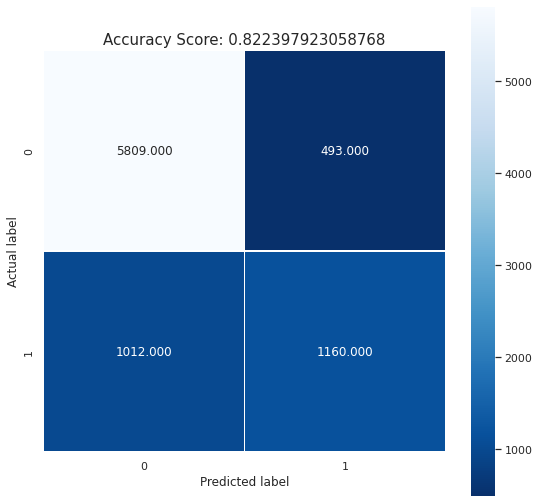

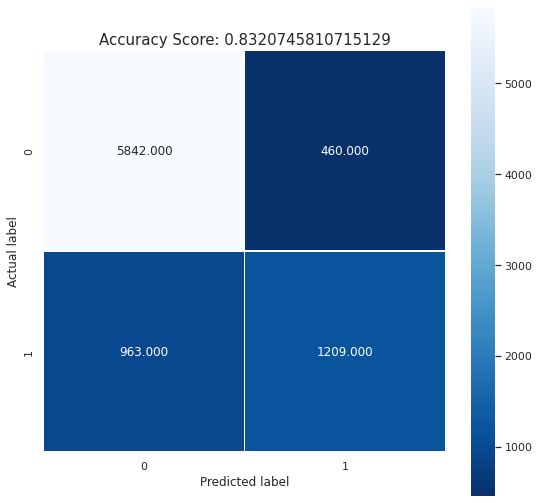

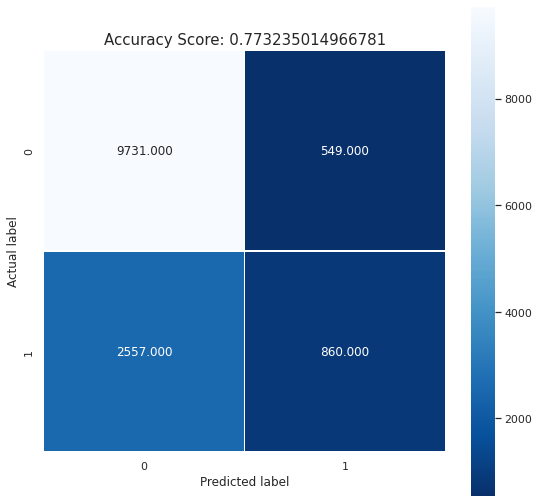

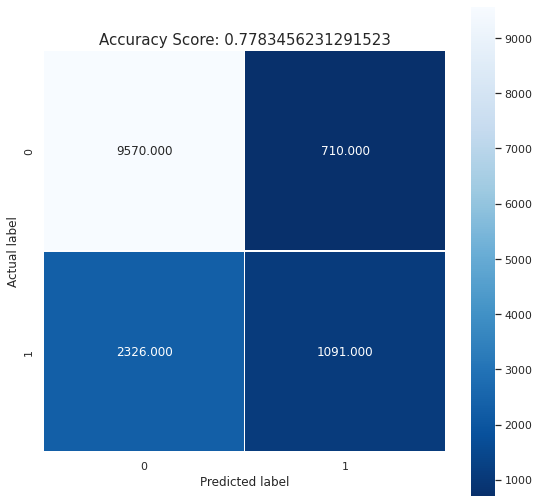

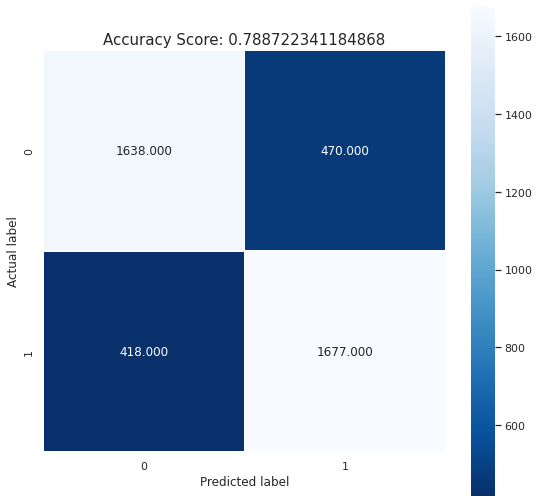

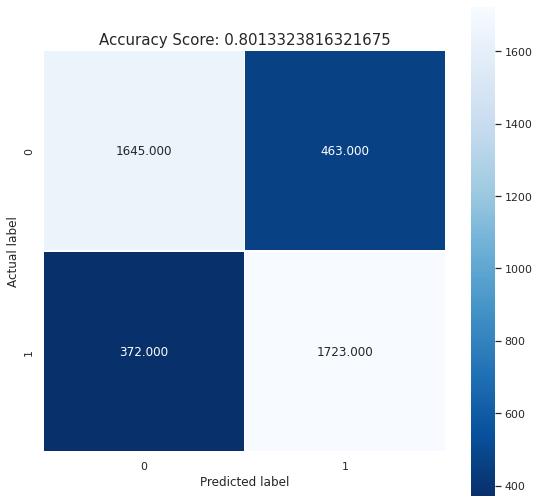

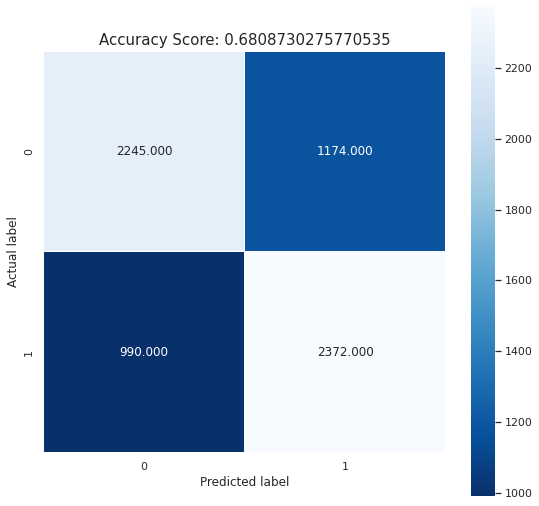

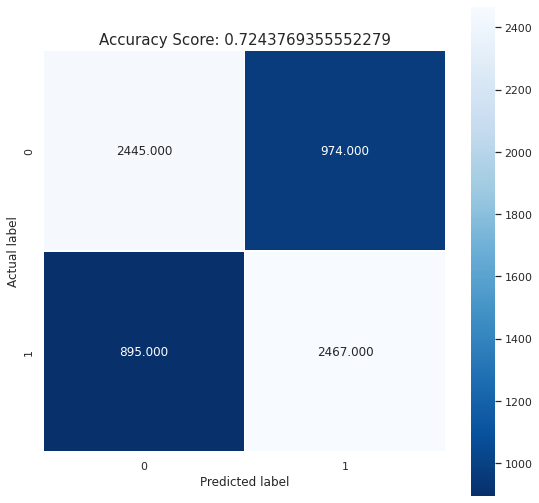

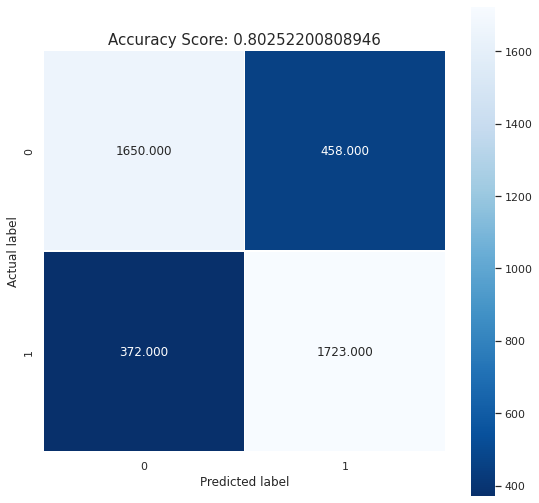

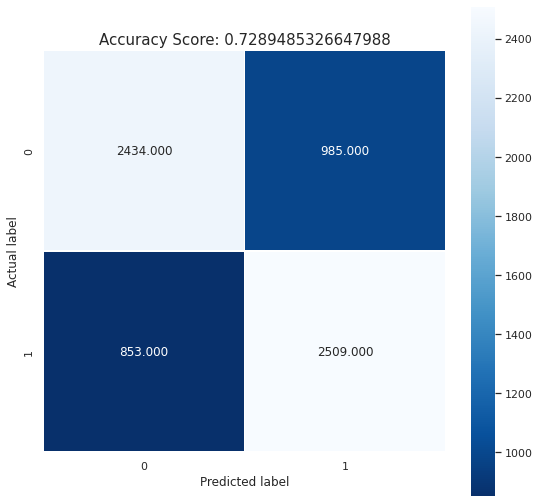

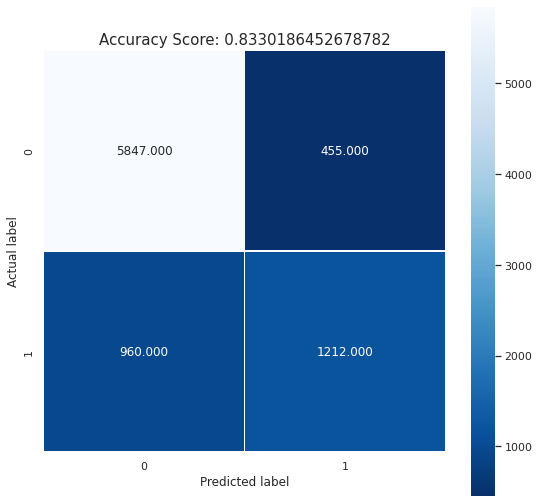

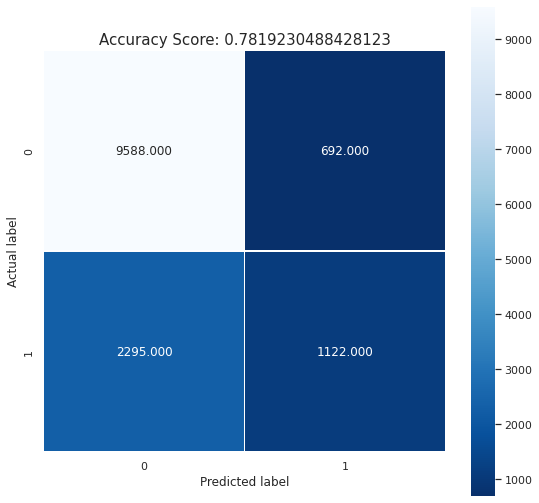

In [ ]:
#Confusion Matrix
print(plot_confusion_matrix(LR_cat_dum[2],LR_cat_dum[0]))
print(plot_confusion_matrix(LR_nocat_dum[2],LR_nocat_dum[0]))
print(plot_confusion_matrix(LR_cat_targ[2],LR_cat_targ[0]))
print(plot_confusion_matrix(LR_nocat_targ[2],LR_nocat_targ[0]))
print(plot_confusion_matrix(LR_under_cat_dum[2],LR_under_cat_dum[0]))
print(plot_confusion_matrix(LR_under_nocat_dum[2],LR_under_nocat_dum[0]))
print(plot_confusion_matrix(LR_under_cat_targ[2],LR_under_cat_targ[0]))
print(plot_confusion_matrix(LR_under_nocat_targ[2],LR_under_nocat_targ[0]))
print(plot_confusion_matrix(LR_under_norm_dum[2],LR_under_norm_dum[0]))
print(plot_confusion_matrix(LR_under_norm_targ[2],LR_under_norm_targ[0]))
print(plot_confusion_matrix(LR_norm_dum[2],LR_norm_dum[0]))
print(plot_confusion_matrix(LR_norm_targ[2],LR_norm_targ[0]))

#### Tuning hyperparameters

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

‘liblinear’ might be slower in LogisticRegressionCV because it does not handle warm-starting. ‘liblinear’ is limited to one-versus-rest schemes.

‘newton-cholesky’ is a good choice for n_samples >> n_features, especially with one-hot encoded categorical features with rare categories. Note that it is limited to binary classification and the one-versus-rest reduction for multiclass classification. Be aware that the memory usage of this solver has a quadratic dependency on n_features because it explicitly computes the Hessian matrix.

In [ ]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [ ]:
grid_values = {'penalty': ['l2', 'l1', 'elasticnet'], 
               'C': [0.01,0.1,1,10,100], 
               'solver': ['lbfgs', 'liblinear', 'sag', 'saga', 'newton-cholesky'], 
               'max_iter': [100,400], 
               'random_state': [0, 42]}
logreg1 = LogisticRegression()
clf = GridSearchCV(logreg1,                    # model
                   param_grid = grid_values,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   )

In [ ]:
#We apply grid search on the dataset with the best results which is dataset 11 normalised with dummy encoder
clf.fit(X11_learn, y11_learn)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [100, 400],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'random_state': [0, 42],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga',
                                    'newton-cholesky']},
             scoring='accuracy')

After 50 minutes of running, we obtained the following best results over model number 11

In [ ]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}
Accuracy : 0.8346247622053726


In [ ]:
logreg = LogisticRegression(C = 1, 
                            max_iter = 100,
                            penalty = 'l1', 
                            random_state = 0,
                            solver = 'liblinear')
logreg.fit(X11_learn,y11_learn)
y11_pred = logreg.predict(X11_val)
print("Accuracy:",logreg.score(X11_val, y11_val))

Accuracy: 0.8320745810715129


In [ ]:
confusion_matrix(y11_pred, y11_val)

array([[5837,  958],
       [ 465, 1214]])

### Gaussian Naive Bayes

In [ ]:
#Gaussian function returning the accuracy
def Gaussian(X_learn,y_learn,X_val,y_val):
  gaussian = GaussianNB()
  gaussian.fit(X_learn, y_learn)
  y_pred = gaussian.predict(X_val)
  return sklearn.metrics.accuracy_score(y_val, y_pred, normalize=True, sample_weight=None),classification_report(y_val, y_pred),confusion_matrix(y_val, y_pred)

In [ ]:
GaussianNB().get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [ ]:
#Gaussian for each model
Gaus_cat_dum=Gaussian(X1_learn,y1_learn,X1_val,y1_val)
Gaus_nocat_dum=Gaussian(X2_learn,y2_learn,X2_val,y2_val)
Gaus_cat_targ=Gaussian(X3_learn,y3_learn,X3_val,y3_val)
Gaus_nocat_targ=Gaussian(X4_learn,y4_learn,X4_val,y4_val)
Gaus_under_cat_dum=Gaussian(X5_learn,y5_learn,X5_val,y5_val)
Gaus_under_nocat_dum=Gaussian(X6_learn,y6_learn,X6_val,y6_val)
Gaus_under_cat_targ=Gaussian(X7_learn,y7_learn,X7_val,y7_val)
Gaus_under_nocat_targ=Gaussian(X8_learn,y8_learn,X8_val,y8_val)
Gaus_under_norm_dum=Gaussian(X9_learn,y9_learn,X9_val,y9_val)
Gaus_under_norm_targ=Gaussian(X10_learn,y10_learn,X10_val,y10_val)
Gaus_norm_dum=Gaussian(X11_learn,y11_learn,X11_val,y11_val)
Gaus_norm_targ=Gaussian(X12_learn,y12_learn,X12_val,y12_val)

In [ ]:
#Accuracy scores for each model
accuracy_Gaus_cat_dum=Gaus_cat_dum[0]
accuracy_Gaus_nocat_dum=Gaus_nocat_dum[0]
accuracy_Gaus_cat_targ=Gaus_cat_targ[0]
accuracy_Gaus_nocat_targ=Gaus_nocat_targ[0]
accuracy_Gaus_under_cat_dum=Gaus_under_cat_dum[0]
accuracy_Gaus_under_nocat_dum=Gaus_under_nocat_dum[0]
accuracy_Gaus_under_cat_targ=Gaus_under_cat_targ[0]
accuracy_Gaus_under_nocat_targ=Gaus_under_nocat_targ[0]
accuracy_Gaus_under_norm_dum=Gaus_under_norm_dum[0]
accuracy_Gaus_under_norm_targ=Gaus_under_norm_targ[0]
accuracy_Gaus_norm_dum=Gaus_norm_dum[0]
accuracy_Gaus_norm_targ=Gaus_norm_targ[0]

In [ ]:
#Dataframe of accuracy for Gaussian
Gaus_data = {'data':  ['cat_dum', 'nocat_dum', 'cat_targ', 'nocat_targ', 'under_cat_dum','under_nocat_dum','under_cat_targ','under_nocat_targ','under_norm_dum','under_norm_targ','norm_dum','norm_targ'],
        'accuracy': [accuracy_Gaus_cat_dum,accuracy_Gaus_nocat_dum,accuracy_Gaus_cat_targ,accuracy_Gaus_nocat_targ,accuracy_Gaus_under_cat_dum,accuracy_Gaus_under_nocat_dum,accuracy_Gaus_under_cat_targ,accuracy_Gaus_under_nocat_targ,accuracy_Gaus_under_norm_dum,accuracy_Gaus_under_norm_targ,accuracy_Gaus_norm_dum,accuracy_Gaus_norm_targ]
        }

Gaus_accuracy = pd.DataFrame(Gaus_data)

Gaus_accuracy

,data,accuracy
0,cat_dum,0.739438
1,nocat_dum,0.746991
2,cat_targ,0.736366
3,nocat_targ,0.769001
4,under_cat_dum,0.750892
5,under_nocat_dum,0.764216
6,under_cat_targ,0.667748
7,under_nocat_targ,0.709187
8,under_norm_dum,0.765168
9,under_norm_targ,0.715971


In [ ]:
#Classification report for every model
print('Gaus_cat_dum')
print(Gaus_cat_dum[1])
print('Gaus_nocat_dum')
print(Gaus_nocat_dum[1])
print('Gaus_cat_targ')
print(Gaus_cat_targ[1])
print('Gaus_nocat_targ')
print(Gaus_nocat_targ[1])
print('Gaus_under_cat_dum')
print(Gaus_under_cat_dum[1])
print('Gaus_under_nocat_dum')
print(Gaus_under_nocat_dum[1])
print('Gaus_under_cat_targ')
print(Gaus_under_cat_targ[1])
print('Gaus_under_nocat_targ')
print(Gaus_under_nocat_targ[1])
print('Gaus_under_norm_dum')
print(Gaus_under_norm_dum[1])
print('Gaus_under_nom_targ')
print(Gaus_under_norm_targ[1])
print('Gaus_norm_dum')
print(Gaus_norm_dum[1])
print('Gaus_norm_targ')
print(Gaus_norm_targ[1])


Gaus_cat_dum
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      6302
           1       0.50      0.82      0.62      2172

    accuracy                           0.74      8474
   macro avg       0.71      0.77      0.71      8474
weighted avg       0.81      0.74      0.76      8474

Gaus_nocat_dum
              precision    recall  f1-score   support

           0       0.93      0.72      0.81      6302
           1       0.50      0.84      0.63      2172

    accuracy                           0.75      8474
   macro avg       0.72      0.78      0.72      8474
weighted avg       0.82      0.75      0.76      8474

Gaus_cat_targ
              precision    recall  f1-score   support

           0       0.82      0.84      0.83     10280
           1       0.47      0.43      0.45      3417

    accuracy                           0.74     13697
   macro avg       0.64      0.63      0.64     13697
weighted avg       0.73      0.7

None
None
None
None
None
None
None
None
None
None
None
None


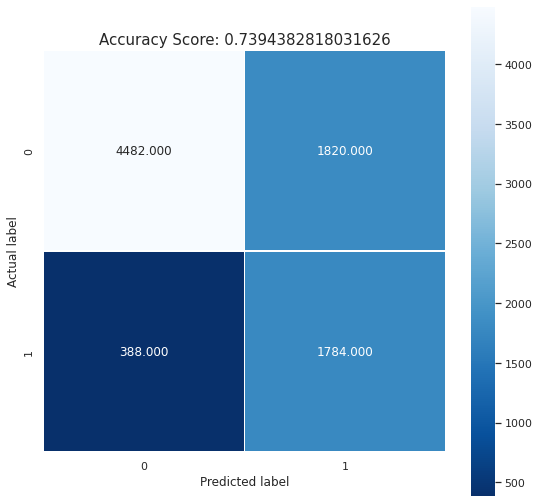

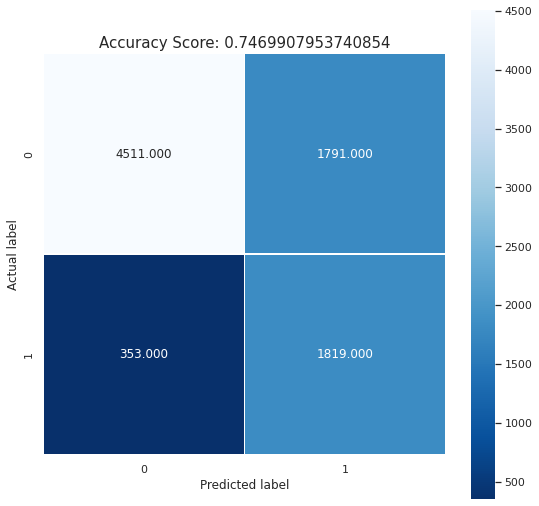

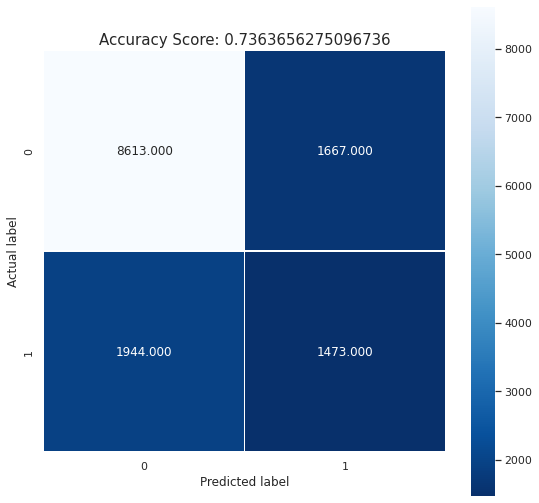

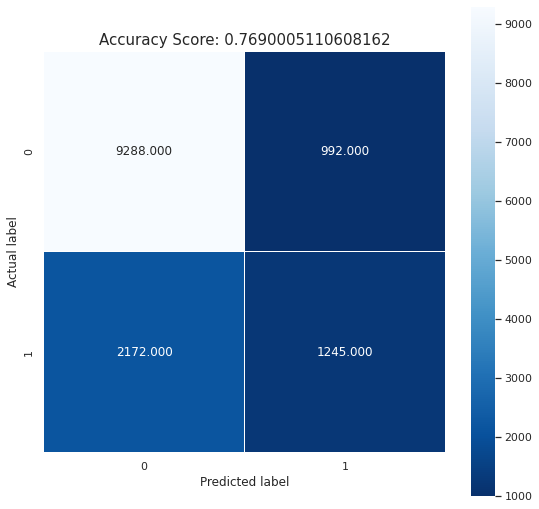

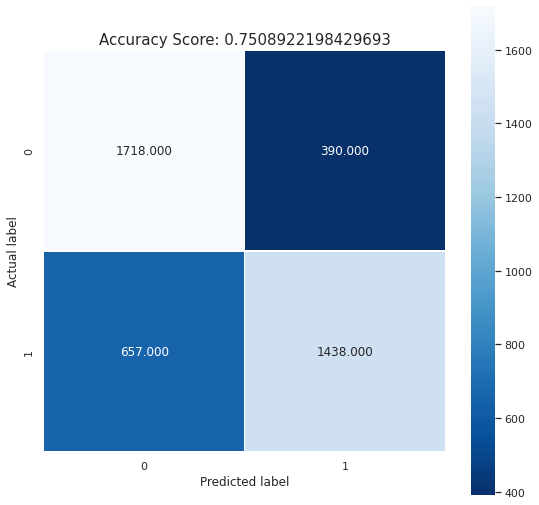

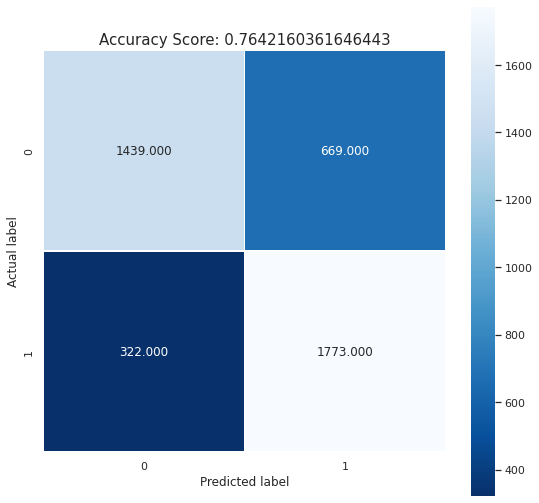

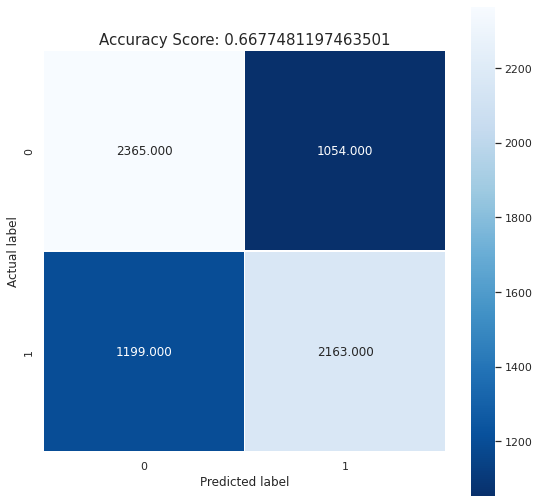

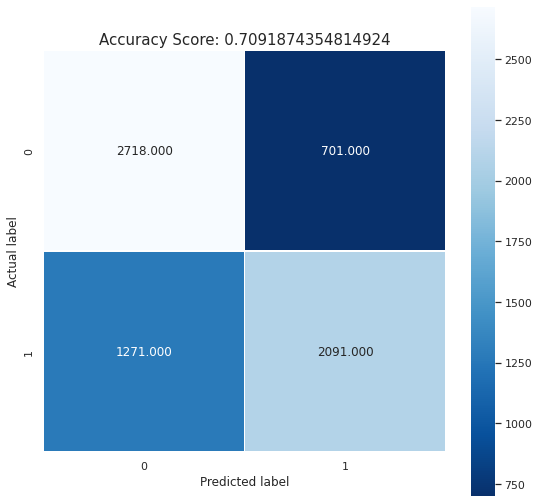

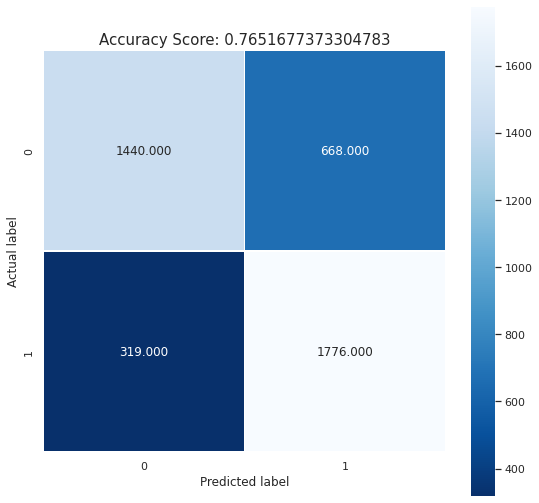

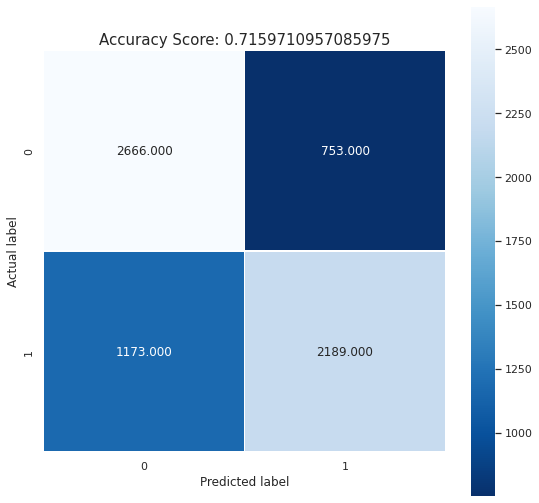

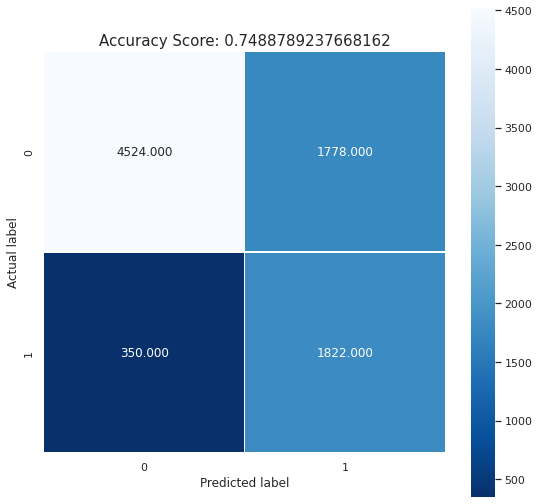

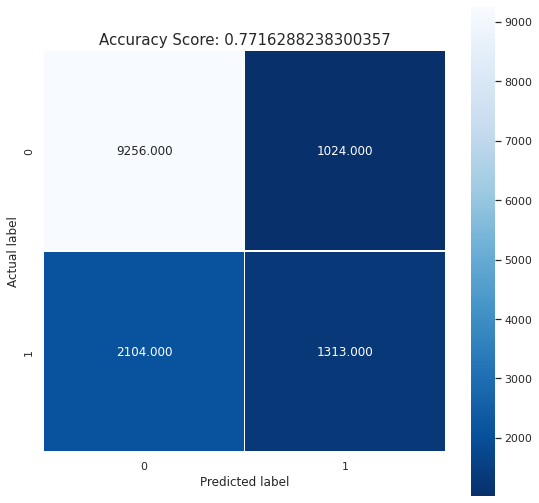

In [ ]:
#Confusion Matrix
print(plot_confusion_matrix(Gaus_cat_dum[2],Gaus_cat_dum[0]))
print(plot_confusion_matrix(Gaus_nocat_dum[2],Gaus_nocat_dum[0]))
print(plot_confusion_matrix(Gaus_cat_targ[2],Gaus_cat_targ[0]))
print(plot_confusion_matrix(Gaus_nocat_targ[2],Gaus_nocat_targ[0]))
print(plot_confusion_matrix(Gaus_under_cat_dum[2],Gaus_under_cat_dum[0]))
print(plot_confusion_matrix(Gaus_under_nocat_dum[2],Gaus_under_nocat_dum[0]))
print(plot_confusion_matrix(Gaus_under_cat_targ[2],Gaus_under_cat_targ[0]))
print(plot_confusion_matrix(Gaus_under_nocat_targ[2],Gaus_under_nocat_targ[0]))
print(plot_confusion_matrix(Gaus_under_norm_dum[2],Gaus_under_norm_dum[0]))
print(plot_confusion_matrix(Gaus_under_norm_targ[2],Gaus_under_norm_targ[0]))
print(plot_confusion_matrix(Gaus_norm_dum[2],Gaus_norm_dum[0]))
print(plot_confusion_matrix(Gaus_norm_targ[2],Gaus_norm_targ[0]))

### Support Vector Machine

In [ ]:
def support_vector_machine(X_learn,y_learn,X_val,y_val):
  clf_SVC = svm.SVC(kernel='rbf', cache_size=1000)
  clf_SVC.fit(X_learn, y_learn)
  y_pred=clf_SVC.predict(X_val)
  return sklearn.metrics.accuracy_score(y_val, y_pred, normalize=True, sample_weight=None),classification_report(y_val, y_pred),confusion_matrix(y_val, y_pred)

In [ ]:
#SVM for each model
SVM_cat_dum=support_vector_machine(X1_learn,y1_learn,X1_val,y1_val)
SVM_nocat_dum=support_vector_machine(X2_learn,y2_learn,X2_val,y2_val)
SVM_cat_targ=support_vector_machine(X3_learn,y3_learn,X3_val,y3_val)
SVM_nocat_targ=support_vector_machine(X4_learn,y4_learn,X4_val,y4_val)
SVM_under_cat_dum=support_vector_machine(X5_learn,y5_learn,X5_val,y5_val)
SVM_under_nocat_dum=support_vector_machine(X6_learn,y6_learn,X6_val,y6_val)
SVM_under_cat_targ=support_vector_machine(X7_learn,y7_learn,X7_val,y7_val)
SVM_under_nocat_targ=support_vector_machine(X8_learn,y8_learn,X8_val,y8_val)
SVM_under_norm_dum=support_vector_machine(X9_learn,y9_learn,X9_val,y9_val)
SVM_under_norm_targ=support_vector_machine(X10_learn,y10_learn,X10_val,y10_val)
SVM_norm_dum=support_vector_machine(X11_learn,y11_learn,X11_val,y11_val)
SVM_norm_targ=support_vector_machine(X12_learn,y12_learn,X12_val,y12_val)

In [ ]:
#Accuracy scores for each model (3mins to execute)
accuracy_SVM_cat_dum=SVM_cat_dum[0]
accuracy_SVM_nocat_dum=SVM_nocat_dum[0]
accuracy_SVM_cat_targ=SVM_cat_targ[0]
accuracy_SVM_nocat_targ=SVM_nocat_targ[0]
accuracy_SVM_under_cat_dum=SVM_under_cat_dum[0]
accuracy_SVM_under_nocat_dum=SVM_under_nocat_dum[0]
accuracy_SVM_under_cat_targ=SVM_under_cat_targ[0]
accuracy_SVM_under_nocat_targ=SVM_under_nocat_targ[0]
accuracy_SVM_under_norm_dum=SVM_under_norm_dum[0]
accuracy_SVM_under_norm_targ=SVM_under_norm_targ[0]
accuracy_SVM_norm_dum=SVM_norm_dum[0]
accuracy_SVM_norm_targ=SVM_norm_targ[0]

In [ ]:
#Dataframe of accuracy for Support Vector Machine
SVM_data = {'data':  ['cat_dum', 'nocat_dum', 'cat_targ', 'nocat_targ', 'under_cat_dum','under_nocat_dum','under_cat_targ','under_nocat_targ','under_norm_dum','under_norm_targ','norm_dum','norm_targ'],
        'accuracy': [accuracy_SVM_cat_dum,accuracy_SVM_nocat_dum,accuracy_SVM_cat_targ,accuracy_SVM_nocat_targ,accuracy_SVM_under_cat_dum, accuracy_SVM_under_nocat_dum,accuracy_SVM_under_cat_targ,accuracy_SVM_under_nocat_targ,accuracy_SVM_under_norm_dum,accuracy_SVM_under_norm_targ,accuracy_SVM_norm_dum,accuracy_SVM_norm_targ]
        }

SVM_accuracy = pd.DataFrame(SVM_data)

SVM_accuracy

,data,accuracy
0,cat_dum,0.819212
1,nocat_dum,0.744395
2,cat_targ,0.772213
3,nocat_targ,0.757903
4,under_cat_dum,0.793243
5,under_nocat_dum,0.542708
6,under_cat_targ,0.680726
7,under_nocat_targ,0.547707
8,under_norm_dum,0.542232
9,under_norm_targ,0.547559


In [ ]:
#Classification report for every model
print('SVM_cat_dum')
print(SVM_cat_dum[1])
print('SVM_nocat_dum')
print(SVM_nocat_dum[1])
print('SVM_cat_targ')
print(SVM_cat_targ[1])
print('SVM_nocat_targ')
print(SVM_nocat_targ[1])
print('SVM_under_cat_dum')
print(SVM_under_cat_dum[1])
print('SVM_under_nocat_dum')
print(SVM_under_nocat_dum[1])
print('SVM_under_cat_targ')
print(SVM_under_cat_targ[1])
print('SVM_under_nocat_targ')
print(SVM_under_nocat_targ[1])
print('SVM_under_norm_dum')
print(SVM_under_norm_dum[1])
print('SVM_under_nom_targ')
print(SVM_under_norm_targ[1])
print('SVM_norm_dum')
print(SVM_norm_dum[1])
print('SVM_norm_targ')
print(SVM_norm_targ[1])

SVM_cat_dum
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      6302
           1       0.70      0.51      0.59      2172

    accuracy                           0.82      8474
   macro avg       0.77      0.72      0.74      8474
weighted avg       0.81      0.82      0.81      8474

SVM_nocat_dum
              precision    recall  f1-score   support

           0       0.75      0.99      0.85      6302
           1       0.52      0.03      0.06      2172

    accuracy                           0.74      8474
   macro avg       0.64      0.51      0.46      8474
weighted avg       0.69      0.74      0.65      8474

SVM_cat_targ
              precision    recall  f1-score   support

           0       0.79      0.94      0.86     10280
           1       0.60      0.26      0.36      3417

    accuracy                           0.77     13697
   macro avg       0.70      0.60      0.61     13697
weighted avg       0.74      0.77  

None
None
None
None
None
None
None
None
None
None
None
None


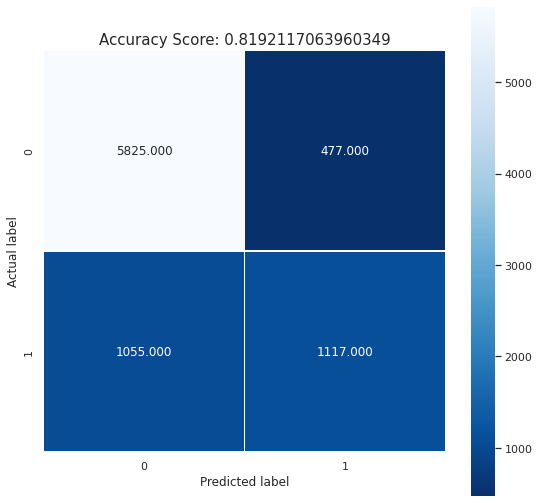

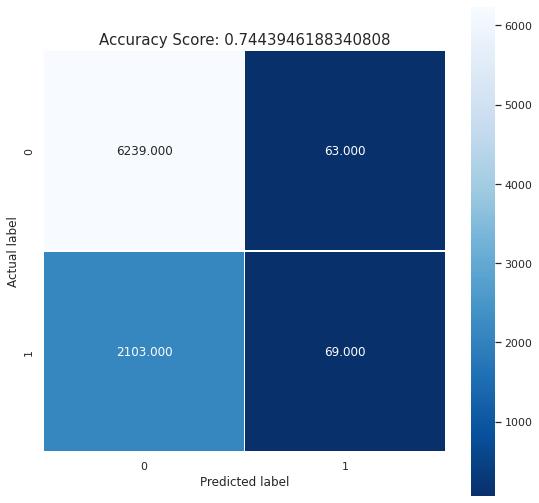

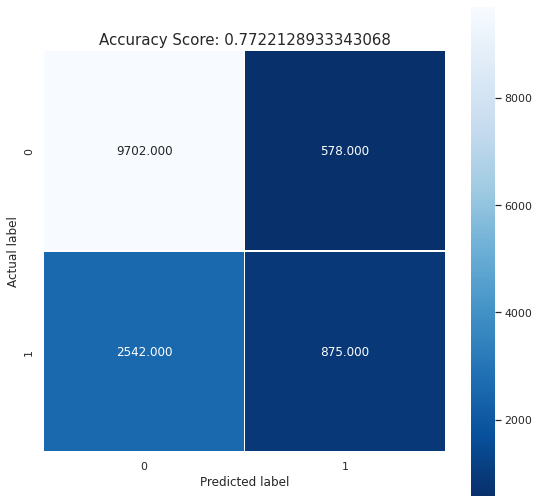

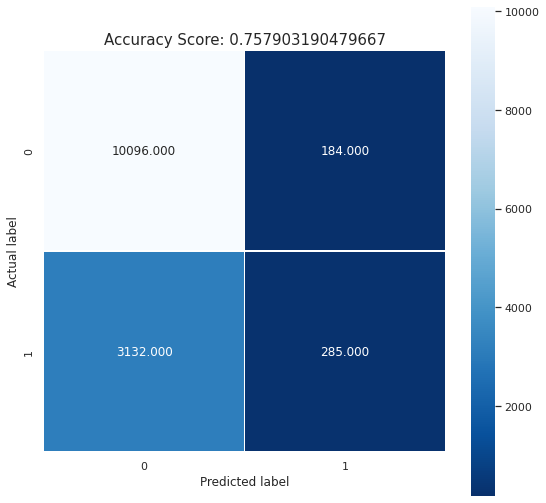

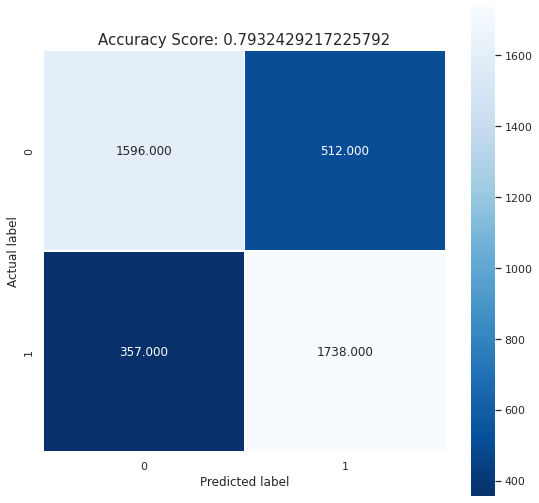

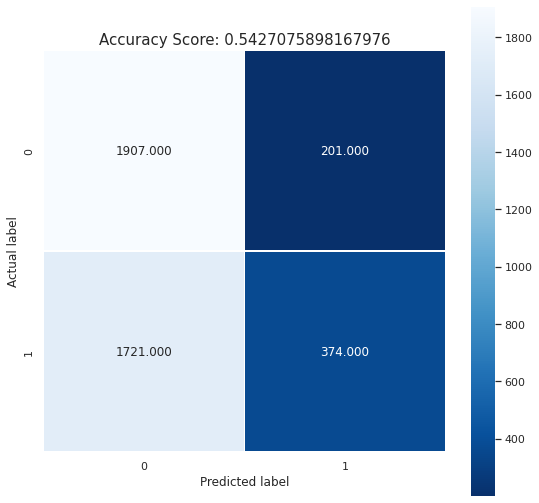

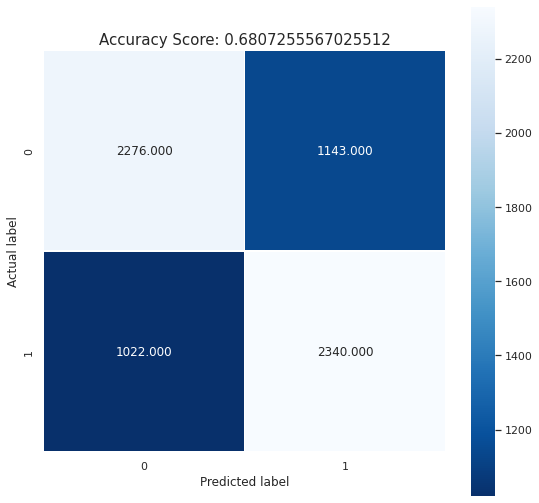

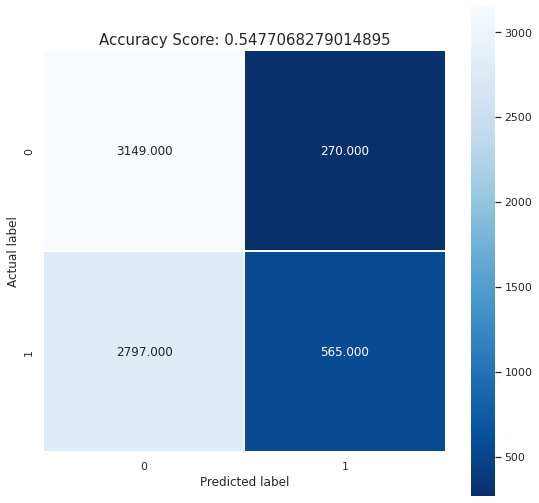

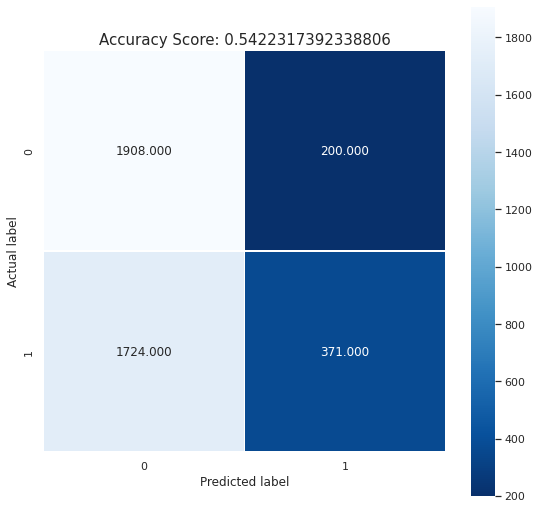

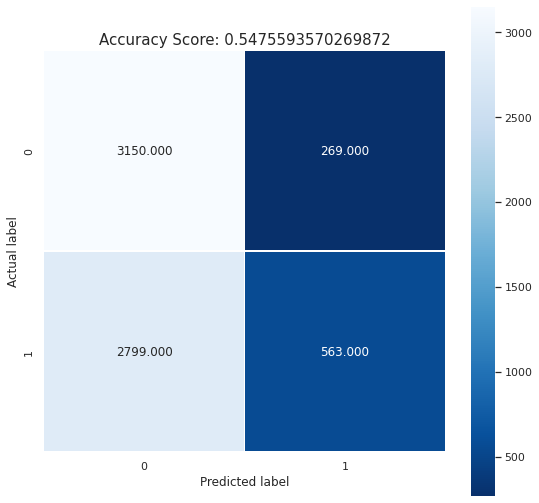

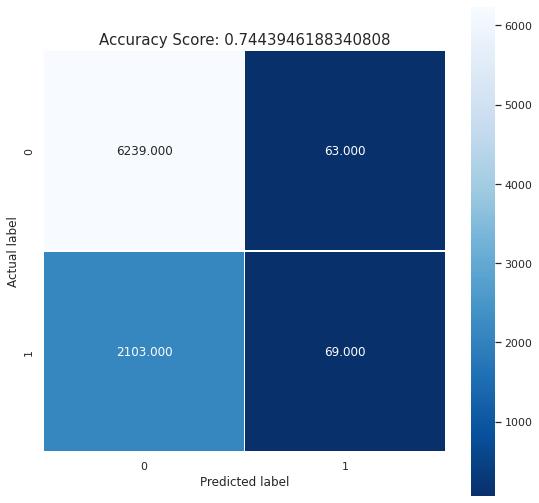

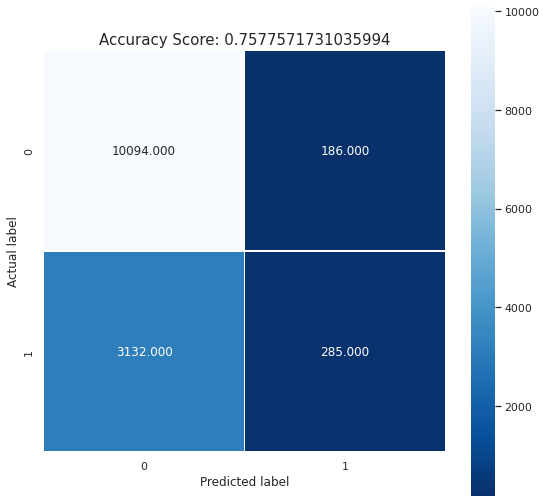

In [ ]:
#Confusion Matrix
print(plot_confusion_matrix(SVM_cat_dum[2],SVM_cat_dum[0]))
print(plot_confusion_matrix(SVM_nocat_dum[2],SVM_nocat_dum[0]))
print(plot_confusion_matrix(SVM_cat_targ[2],SVM_cat_targ[0]))
print(plot_confusion_matrix(SVM_nocat_targ[2],SVM_nocat_targ[0]))
print(plot_confusion_matrix(SVM_under_cat_dum[2],SVM_under_cat_dum[0]))
print(plot_confusion_matrix(SVM_under_nocat_dum[2],SVM_under_nocat_dum[0]))
print(plot_confusion_matrix(SVM_under_cat_targ[2],SVM_under_cat_targ[0]))
print(plot_confusion_matrix(SVM_under_nocat_targ[2],SVM_under_nocat_targ[0]))
print(plot_confusion_matrix(SVM_under_norm_dum[2],SVM_under_norm_dum[0]))
print(plot_confusion_matrix(SVM_under_norm_targ[2],SVM_under_norm_targ[0]))
print(plot_confusion_matrix(SVM_norm_dum[2],SVM_norm_dum[0]))
print(plot_confusion_matrix(SVM_norm_targ[2],SVM_norm_targ[0]))

#### Tuning hyperparameters

In [ ]:
svm.SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [ ]:
param_grid = {'C': [0.1, 1, 10], #default 1
              'degree': [1, 2, 3], #default 3
              'gamma': [0.1, 1, 10, 'scale', 'auto'], #default scale
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], #default rbf
              'cache_size': [1000], #default 200
              'class_weight': ['balanced', None], #default None
              'max_iter': [1000] #default -1
              }

In [ ]:
SVC = svm.SVC()
clf = GridSearchCV(SVC,                  # model
                   param_grid,           # hyperparameters
                   scoring='accuracy',   # metric for scoring
                   )

NameError: ignored

In [ ]:
clf.fit(X1_learn, y1_learn)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'cache_size': [1000],
                         'class_weight': ['balanced', 'None'],
                         'degree': [1, 2, 3],
                         'gamma': [0.1, 1, 10, 'scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [1000]},
             scoring='accuracy')

In [ ]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 10, 'cache_size': 1000, 'class_weight': 'balanced', 'degree': 1, 'gamma': 10, 'kernel': 'rbf', 'max_iter': 1000}
Accuracy : 0.7440305754185147


In [ ]:
svm = svm.SVC(C = 10,
              cache_size = 1000,
              class_weight = 'balanced',
              degree = 1,
              gamma = 10, 
              kernel = 'rbf')
svm.fit(X1_learn,y1_learn)
y1_pred = svm.predict(X1_val)
print("Accuracy:",svm.score(X1_val, y1_val))

Accuracy: 0.771064432381402


In [ ]:
confusion_matrix(y1_pred, y1_val)

array([[4900,  538],
       [1402, 1634]])

#### Custom Kernels


First, we redefined the linear kernel.

In [ ]:
def linear_kernel(x_i, x_j):
    return x_i.dot(x_j.T)

In [ ]:
clf1 = SVC(kernel = linear_kernel,max_iter=1)
clf1.fit(X11_learn,y11_learn)
print(f'Accuracy on Linear Kernel: {accuracy_score(y11_val, clf1.predict(X11_val))}')

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy on Linear Kernel: 0.49940995987727166


In [ ]:
clf2 = SVC(kernel = 'linear',max_iter=1)
clf2.fit(X11_learn, y11_learn)
print(f'Accuracy on Inbuilt Kernel: {accuracy_score(y11_val, clf2.predict(X11_val))}')

Accuracy on Inbuilt Kernel: 0.49940995987727166


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Then, we do the same but for the RBF kernel as it is the one having the best results (if we look at the grid search section on SVM).

In [ ]:
def RBF_kernel(X, Y, gamma=0.1):
    K = euclidean_distances(X, Y, squared=True)
    K *= -gamma
    np.exp(K, K)  # exponentiate K in-place
    return K

def eval_RBF_kernel(kernel):
    model = SVC(kernel=kernel,gamma=0.1,max_iter=-1)
    model.fit(X11_learn, y11_learn)
    X11_val_predict = model.predict(X11_val)
    acc = (X11_val_predict == y11_val).sum() / y11_val.shape[0]
    return acc

print('theoretical')
print(eval_RBF_kernel('rbf'))
print('experimental')
print(eval_RBF_kernel(RBF_kernel))

theoretical
0.8270002360160491
experimental
0.8270002360160491


### Random Forest Classifier

In [ ]:
def RForest(X_learn,y_learn,X_val,y_val):
  clf = RandomForestClassifier()
  clf.fit(X_learn, y_learn)
  y_pred = clf.predict(X_val)
  return sklearn.metrics.accuracy_score(y_val, y_pred, normalize=True, sample_weight=None),classification_report(y_val, y_pred),confusion_matrix(y_val, y_pred)

In [ ]:
#RForest for each model
Forest_cat_dum=RForest(X1_learn,y1_learn,X1_val,y1_val)
Forest_nocat_dum=RForest(X2_learn,y2_learn,X2_val,y2_val)
Forest_cat_targ=RForest(X3_learn,y3_learn,X3_val,y3_val)
Forest_nocat_targ=RForest(X4_learn,y4_learn,X4_val,y4_val)
Forest_under_cat_dum=RForest(X5_learn,y5_learn,X5_val,y5_val)
Forest_under_nocat_dum=RForest(X6_learn,y6_learn,X6_val,y6_val)
Forest_under_cat_targ=RForest(X7_learn,y7_learn,X7_val,y7_val)
Forest_under_nocat_targ=RForest(X8_learn,y8_learn,X8_val,y8_val)
Forest_under_norm_dum=RForest(X9_learn,y9_learn,X9_val,y9_val)
Forest_under_norm_targ=RForest(X10_learn,y10_learn,X10_val,y10_val)
Forest_norm_dum=RForest(X11_learn,y11_learn,X11_val,y11_val)
Forest_norm_targ=RForest(X12_learn,y12_learn,X12_val,y12_val)

In [ ]:
#Accuracy scores for each model
accuracy_Forest_cat_dum=Forest_cat_dum[0]
accuracy_Forest_nocat_dum=Forest_nocat_dum[0]
accuracy_Forest_cat_targ=Forest_cat_targ[0]
accuracy_Forest_nocat_targ=Forest_nocat_targ[0]
accuracy_Forest_under_cat_dum=Forest_under_cat_dum[0]
accuracy_Forest_under_nocat_dum=Forest_under_nocat_dum[0]
accuracy_Forest_under_cat_targ=Forest_under_cat_targ[0]
accuracy_Forest_under_nocat_targ=Forest_under_nocat_targ[0]
accuracy_Forest_under_norm_dum=Forest_under_norm_dum[0]
accuracy_Forest_under_norm_targ=Forest_under_norm_targ[0]
accuracy_Forest_norm_dum=Forest_norm_dum[0]
accuracy_Forest_norm_targ=Forest_norm_targ[0]

In [ ]:
#Dataframe of accuracy for Random Forest
Forest_data = {'data':  ['cat_dum', 'nocat_dum', 'cat_targ', 'nocat_targ', 'under_cat_dum','under_nocat_dum','under_cat_targ','under_nocat_targ','under_norm_dum','under_norm_targ','norm_dum','norm_targ'],
        'accuracy': [accuracy_Forest_cat_dum,accuracy_Forest_nocat_dum,accuracy_Forest_cat_targ,accuracy_Forest_nocat_targ,accuracy_Forest_under_cat_dum,accuracy_Forest_under_nocat_dum,accuracy_Forest_under_cat_targ,accuracy_Forest_under_nocat_targ,accuracy_Forest_under_norm_dum,accuracy_Forest_under_norm_targ,accuracy_Forest_norm_dum,accuracy_Forest_norm_targ]
        }

Forest_accuracy = pd.DataFrame(Forest_data)

Forest_accuracy

,data,accuracy
0,cat_dum,0.811423
1,nocat_dum,0.821336
2,cat_targ,0.759071
3,nocat_targ,0.782653
4,under_cat_dum,0.778492
5,under_nocat_dum,0.784916
6,under_cat_targ,0.661407
7,under_nocat_targ,0.722607
8,under_norm_dum,0.787533
9,under_norm_targ,0.720985


In [ ]:
#Classification report for every model
print('Forest_cat_dum')
print(Forest_cat_dum[1])
print('Forest_nocat_dum')
print(Forest_nocat_dum[1])
print('Forest_cat_targ')
print(Forest_cat_targ[1])
print('Forest_nocat_targ')
print(Forest_nocat_targ[1])
print('Forest_under_cat_dum')
print(Forest_under_cat_dum[1])
print('Forest_under_nocat_dum')
print(Forest_under_nocat_dum[1])
print('Forest_under_cat_targ')
print(Forest_under_cat_targ[1])
print('Forest_under_nocat_targ')
print(Forest_under_nocat_targ[1])
print('Forest_under_norm_dum')
print(Forest_under_norm_dum[1])
print('Forest_under_nom_targ')
print(Forest_under_norm_targ[1])
print('Forest_norm_dum')
print(Forest_norm_dum[1])
print('Forest_norm_targ')
print(Forest_norm_targ[1])

Forest_cat_dum
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      6302
           1       0.66      0.55      0.60      2172

    accuracy                           0.81      8474
   macro avg       0.76      0.72      0.74      8474
weighted avg       0.80      0.81      0.81      8474

Forest_nocat_dum
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      6302
           1       0.68      0.57      0.62      2172

    accuracy                           0.82      8474
   macro avg       0.77      0.74      0.75      8474
weighted avg       0.81      0.82      0.82      8474

Forest_cat_targ
              precision    recall  f1-score   support

           0       0.80      0.91      0.85     10280
           1       0.53      0.30      0.38      3417

    accuracy                           0.76     13697
   macro avg       0.66      0.60      0.62     13697
weighted avg       0.73   

None
None
None
None
None
None
None
None
None
None
None
None


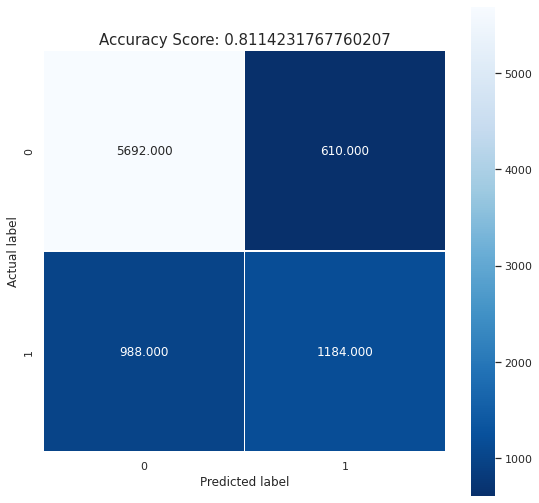

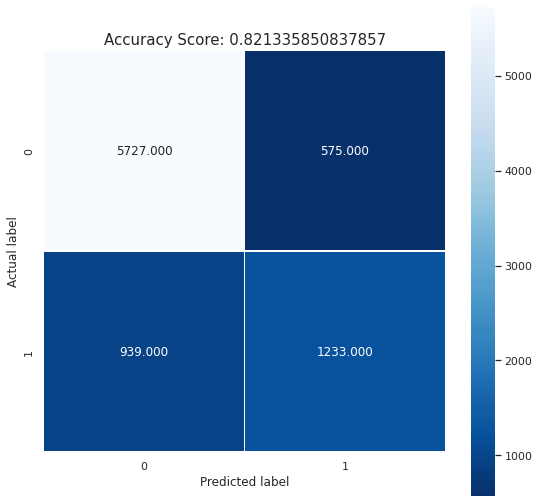

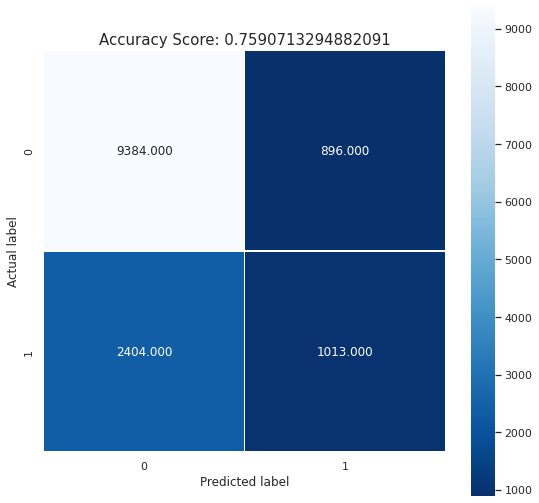

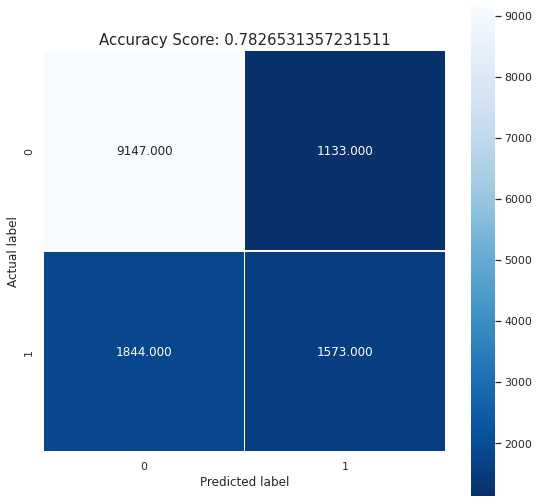

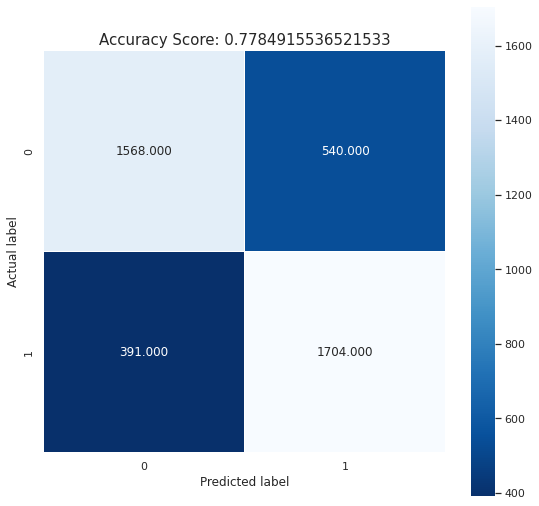

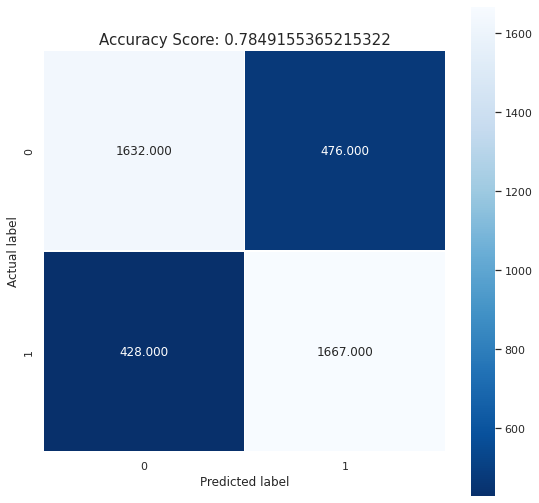

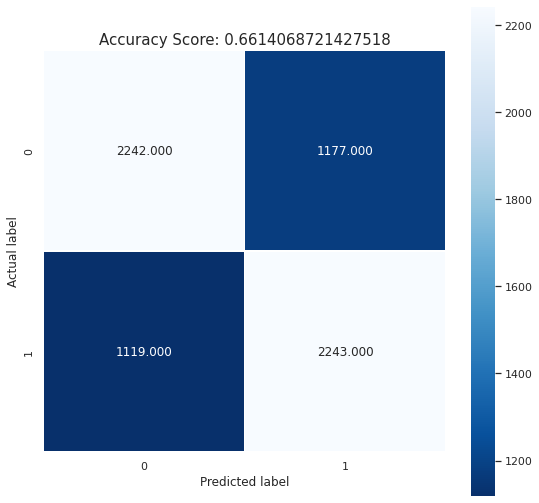

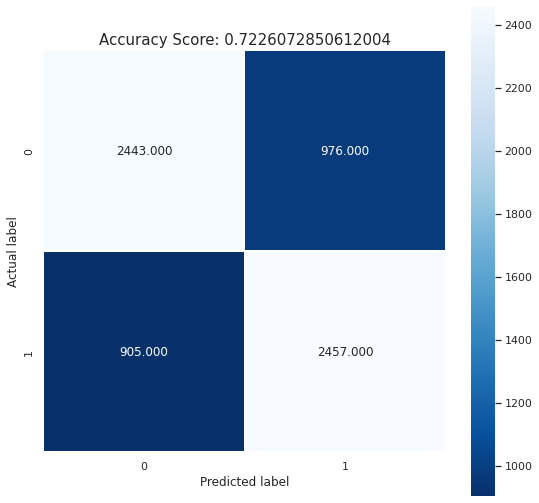

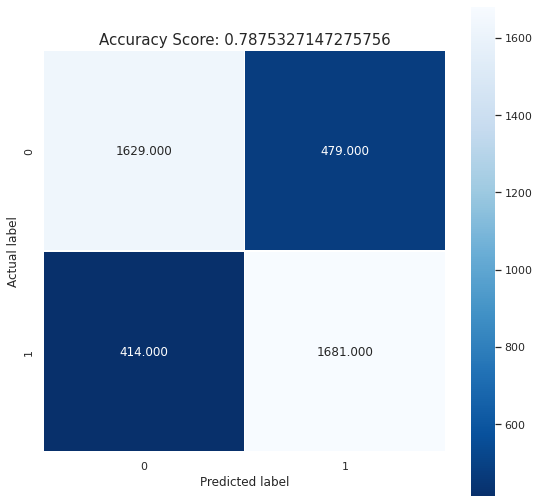

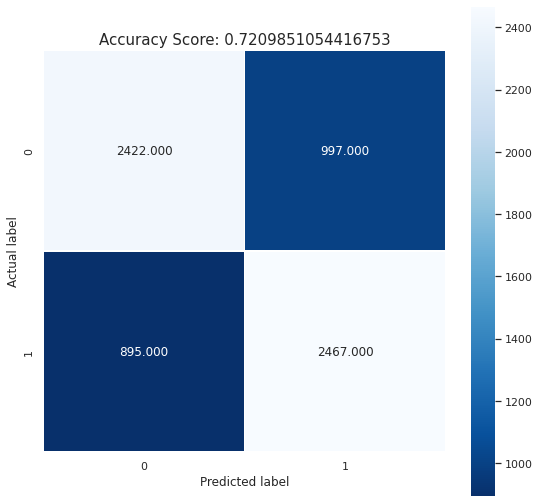

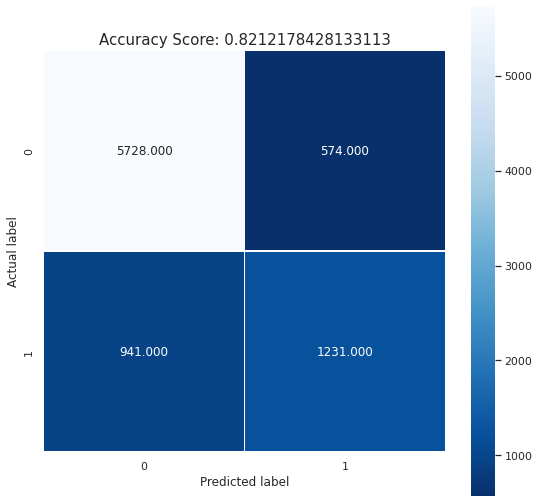

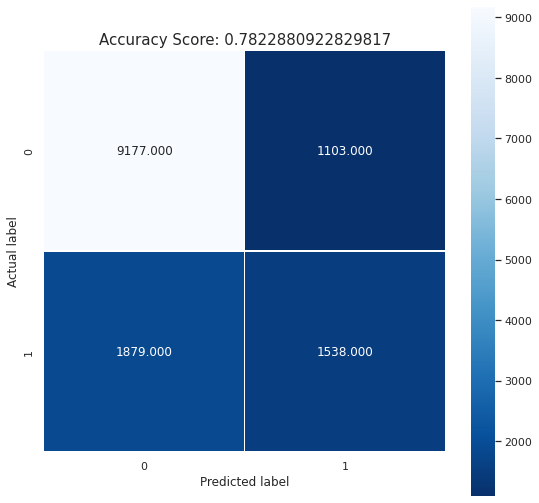

In [ ]:
#Confusion Matrix
print(plot_confusion_matrix(Forest_cat_dum[2],Forest_cat_dum[0]))
print(plot_confusion_matrix(Forest_nocat_dum[2],Forest_nocat_dum[0]))
print(plot_confusion_matrix(Forest_cat_targ[2],Forest_cat_targ[0]))
print(plot_confusion_matrix(Forest_nocat_targ[2],Forest_nocat_targ[0]))
print(plot_confusion_matrix(Forest_under_cat_dum[2],Forest_under_cat_dum[0]))
print(plot_confusion_matrix(Forest_under_nocat_dum[2],Forest_under_nocat_dum[0]))
print(plot_confusion_matrix(Forest_under_cat_targ[2],Forest_under_cat_targ[0]))
print(plot_confusion_matrix(Forest_under_nocat_targ[2],Forest_under_nocat_targ[0]))
print(plot_confusion_matrix(Forest_under_norm_dum[2],Forest_under_norm_dum[0]))
print(plot_confusion_matrix(Forest_under_norm_targ[2],Forest_under_norm_targ[0]))
print(plot_confusion_matrix(Forest_norm_dum[2],Forest_norm_dum[0]))
print(plot_confusion_matrix(Forest_norm_targ[2],Forest_norm_targ[0]))

#### Tuning hyperparameters

In [ ]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
param_grid = {'n_estimators': [300], #default 100
              'criterion': ['gini', 'entropy', 'log_loss'], #default gini
              'max_depth': [None], #default None
              'min_samples_split': [2], #default 2
              'min_samples_leaf': [1], #default 1
              'min_weight_fraction_leaf': [0.0], #default 0.0
              'max_features': ['sqrt', 'log2', None], #default None
              'max_leaf_nodes': [None], #default None
              'min_impurity_decrease': [0.0], ##default 0.0
              'oob_score': [True, False], #default False
              'n_jobs': [-1], #default None (=1)
              'class_weight': [None, 'balanced', 'balanced_subsample'], #default None
              'max_samples': [None] #default None
              }

RFC = RandomForestClassifier()
clf = GridSearchCV(RFC,                  # model
                   param_grid,           # hyperparameters
                   scoring='accuracy',   # metric for scoring
                   )

In [ ]:
#We apply grid search on the best model
clf.fit(X2_learn, y2_learn)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py", line 428, in _process_worker
    r = call_item()
  File "/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py", line 275, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/usr/local/lib/python3.8/dist-packages/joblib/_parallel_backends.py", line 620, in __call__
    return self.func(*

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': [None, 'balanced',
                                          'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [None], 'max_samples': [None],
                         'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [300], 'n_jobs': [-1],
                         'oob_score': [True, False]},
             scoring='accuracy')

In [ ]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': -1, 'oob_score': True}
Accuracy : 0.8240430618122909


### XGBoost

In [ ]:
def XG(X_learn,y_learn,X_val,y_val):
  X_learn_mat=xgb.DMatrix(X_learn, label=y_learn)
  X_val_mat = xgb.DMatrix(X_val, label=y_val)
  parameters = {"booster": "gbtree",
                "objective": "binary:logistic"
                }
  rounds = 20
  validation = [(X_val_mat, "val"), (X_learn_mat, "train")]
  XGBoost=xgb.train(parameters, X_learn_mat, rounds, validation)
  pred=XGBoost.predict(X_val_mat)
  y_pred= [1 if i > .5 else 0 for i in pred]
  return sklearn.metrics.accuracy_score(y_val, y_pred, normalize=True, sample_weight=None),classification_report(y_val, y_pred),confusion_matrix(y_val, y_pred)


In [ ]:
#XG for each model
XG_cat_dum=XG(X1_learn,y1_learn,X1_val,y1_val)
XG_nocat_dum=XG(X2_learn,y2_learn,X2_val,y2_val)
XG_cat_targ=XG(X3_learn,y3_learn,X3_val,y3_val)
XG_nocat_targ=XG(X4_learn,y4_learn,X4_val,y4_val)
XG_under_cat_dum=XG(X5_learn,y5_learn,X5_val,y5_val)
XG_under_nocat_dum=XG(X6_learn,y6_learn,X6_val,y6_val)
XG_under_cat_targ=XG(X7_learn,y7_learn,X7_val,y7_val)
XG_under_nocat_targ=XG(X8_learn,y8_learn,X8_val,y8_val)
XG_under_norm_dum=XG(X9_learn,y9_learn,X9_val,y9_val)
XG_under_norm_targ=XG(X10_learn,y10_learn,X10_val,y10_val)
XG_norm_dum=XG(X11_learn,y11_learn,X11_val,y11_val)
XG_norm_targ=XG(X12_learn,y12_learn,X12_val,y12_val)


[0]	val-error:0.189521	train-error:0.177294
[1]	val-error:0.185273	train-error:0.176901
[2]	val-error:0.185273	train-error:0.172102
[3]	val-error:0.184683	train-error:0.171669
[4]	val-error:0.184093	train-error:0.171433
[5]	val-error:0.182912	train-error:0.170135
[6]	val-error:0.182912	train-error:0.169978
[7]	val-error:0.179018	train-error:0.168286
[8]	val-error:0.1789	train-error:0.168089
[9]	val-error:0.179372	train-error:0.167932
[10]	val-error:0.178782	train-error:0.166555
[11]	val-error:0.17949	train-error:0.16628
[12]	val-error:0.178428	train-error:0.166122
[13]	val-error:0.178428	train-error:0.165886
[14]	val-error:0.17831	train-error:0.165768
[15]	val-error:0.178546	train-error:0.165257
[16]	val-error:0.17831	train-error:0.165139
[17]	val-error:0.17831	train-error:0.165178
[18]	val-error:0.178074	train-error:0.165021
[19]	val-error:0.177484	train-error:0.164982
[0]	val-error:0.175242	train-error:0.167303
[1]	val-error:0.17359	train-error:0.165532
[2]	val-error:0.170168	train-e

In [ ]:
#Accuracy scores for each model
accuracy_XG_cat_dum=XG_cat_dum[0]
accuracy_XG_nocat_dum=XG_nocat_dum[0]
accuracy_XG_cat_targ=XG_cat_targ[0]
accuracy_XG_nocat_targ=XG_nocat_targ[0]
accuracy_XG_under_cat_dum=XG_under_cat_dum[0]
accuracy_XG_under_nocat_dum=XG_under_nocat_dum[0]
accuracy_XG_under_cat_targ=XG_under_cat_targ[0]
accuracy_XG_under_nocat_targ=XG_under_nocat_targ[0]
accuracy_XG_under_norm_dum=XG_under_norm_dum[0]
accuracy_XG_under_norm_targ=XG_under_norm_targ[0]
accuracy_XG_norm_dum=XG_norm_dum[0]
accuracy_XG_norm_targ=XG_norm_targ[0]


In [ ]:
#Dataframe of accuracy for XGBOOST
XG_data = {'data':  ['cat_dum', 'nocat_dum', 'cat_targ', 'nocat_targ', 'under_cat_dum','under_nocat_dum','under_cat_targ','under_nocat_targ','under_norm_dum','under_norm_targ','norm_dum','norm_targ'],
        'accuracy': [accuracy_XG_cat_dum,accuracy_XG_nocat_dum,accuracy_XG_cat_targ,accuracy_XG_nocat_targ,accuracy_XG_under_cat_dum,accuracy_XG_under_nocat_dum,accuracy_XG_under_cat_targ,accuracy_XG_under_nocat_targ,accuracy_XG_under_norm_dum,accuracy_XG_under_norm_targ,accuracy_XG_norm_dum,accuracy_XG_norm_targ]
        }

XG_accuracy = pd.DataFrame(XG_data)

XG_accuracy


,data,accuracy
0,cat_dum,0.822516
1,nocat_dum,0.840807
2,cat_targ,0.770096
3,nocat_targ,0.806308
4,under_cat_dum,0.794908
5,under_nocat_dum,0.811087
6,under_cat_targ,0.692818
7,under_nocat_targ,0.767143
8,under_norm_dum,0.811087
9,under_norm_targ,0.767143


In [ ]:
#Classification report for every model
print('XG_cat_dum')
print(XG_cat_dum[1])
print('XG_nocat_dum')
print(XG_nocat_dum[1])
print('XG_cat_targ')
print(XG_cat_targ[1])
print('XG_nocat_targ')
print(XG_nocat_targ[1])
print('XG_under_cat_dum')
print(XG_under_cat_dum[1])
print('XG_under_nocat_dum')
print(XG_under_nocat_dum[1])
print('XG_under_cat_targ')
print(XG_under_cat_targ[1])
print('XG_under_nocat_targ')
print(XG_under_nocat_targ[1])
print('XG_under_norm_dum')
print(XG_under_norm_dum[1])
print('XG_under_nom_targ')
print(XG_under_norm_targ[1])
print('XG_norm_dum')
print(XG_norm_dum[1])
print('XG_norm_targ')
print(XG_norm_targ[1])


XG_cat_dum
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      6302
           1       0.71      0.53      0.60      2172

    accuracy                           0.82      8474
   macro avg       0.78      0.73      0.74      8474
weighted avg       0.81      0.82      0.81      8474

XG_nocat_dum
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      6302
           1       0.75      0.57      0.65      2172

    accuracy                           0.84      8474
   macro avg       0.81      0.75      0.77      8474
weighted avg       0.83      0.84      0.83      8474

XG_cat_targ
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     10280
           1       0.58      0.29      0.39      3417

    accuracy                           0.77     13697
   macro avg       0.69      0.61      0.62     13697
weighted avg       0.74      0.77     

None
None
None
None
None
None
None
None
None
None
None
None


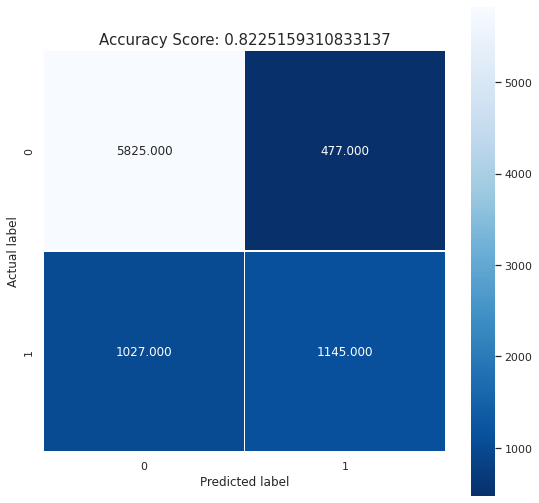

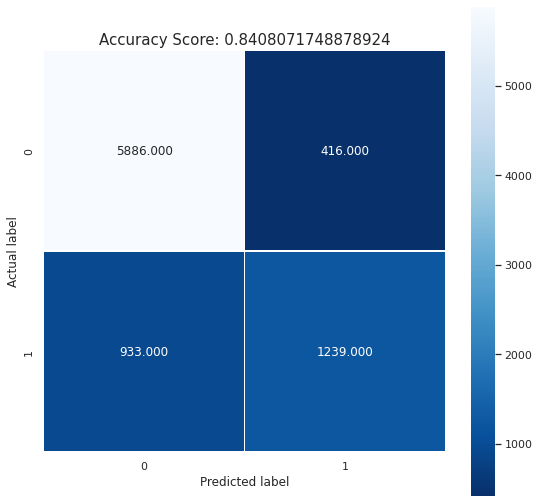

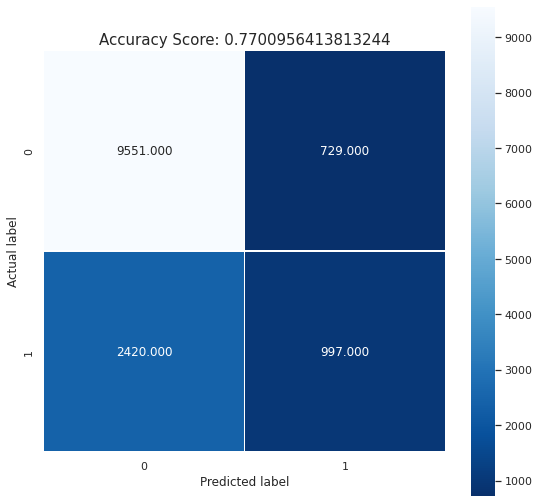

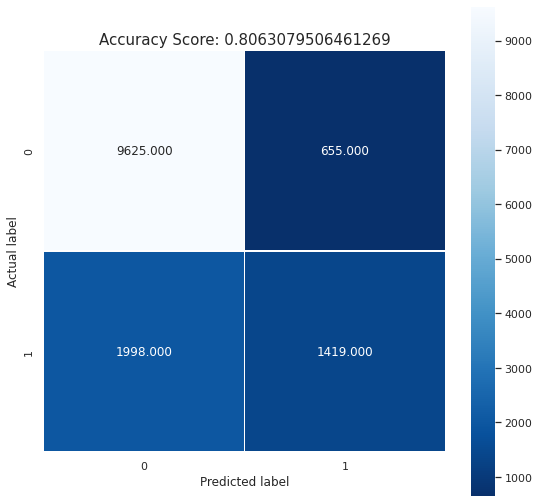

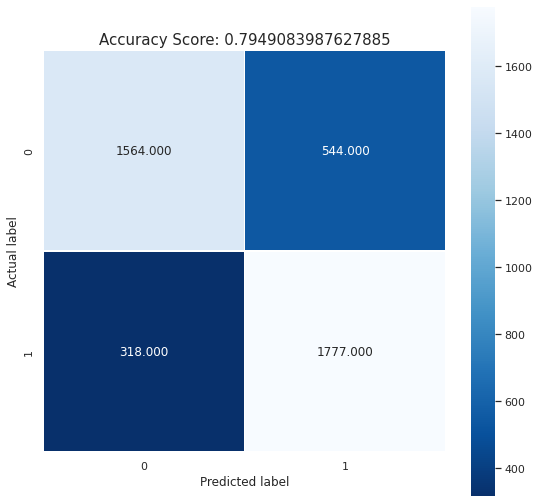

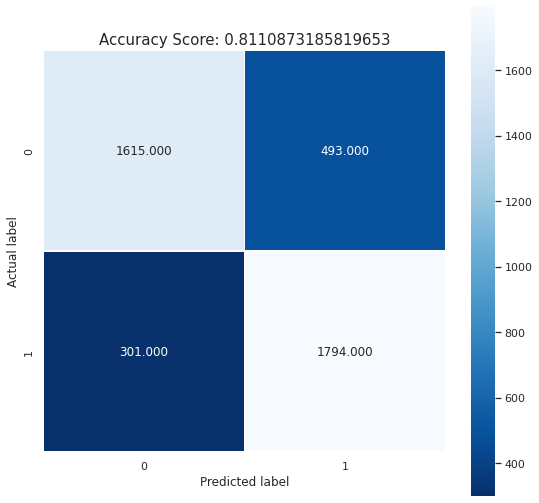

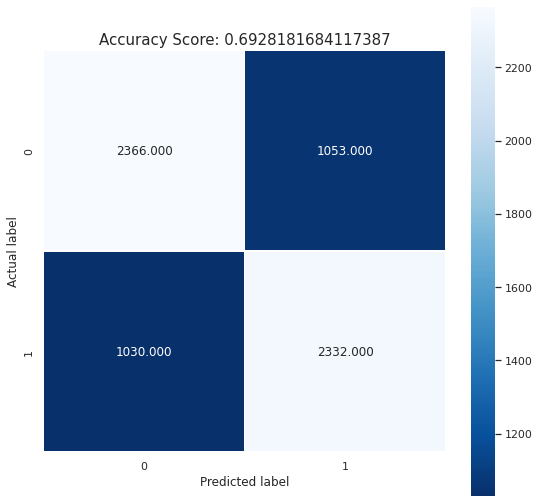

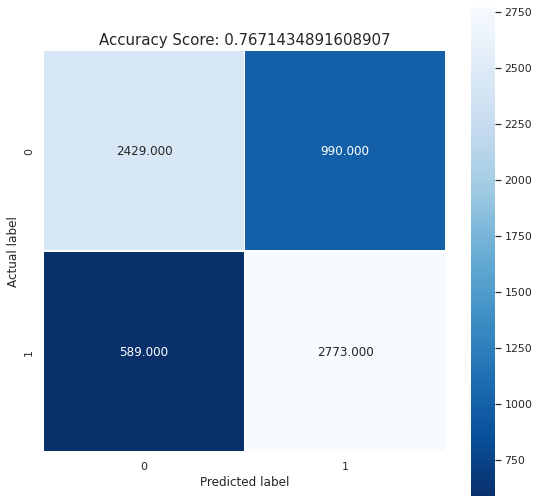

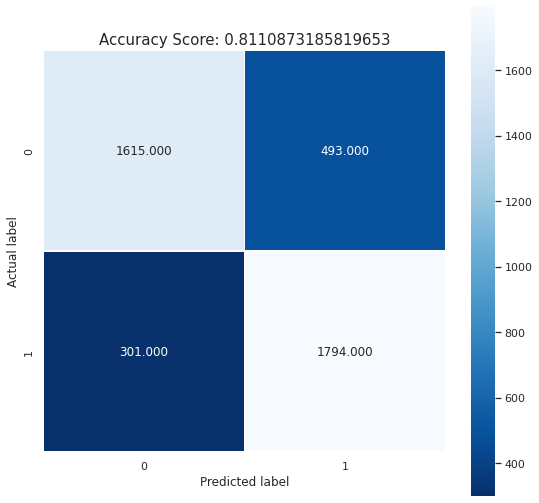

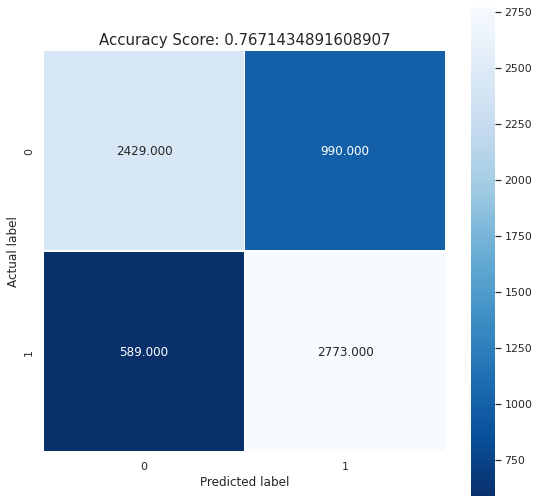

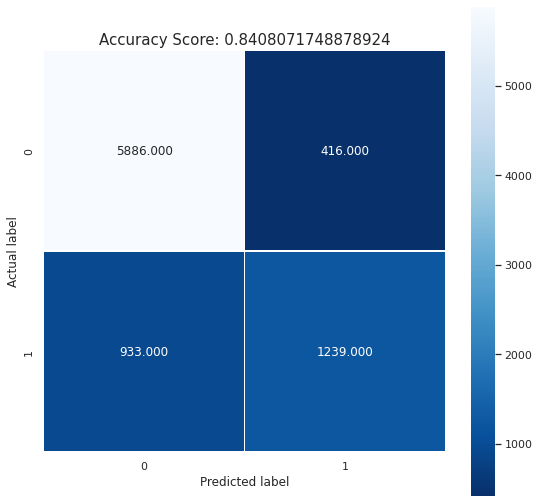

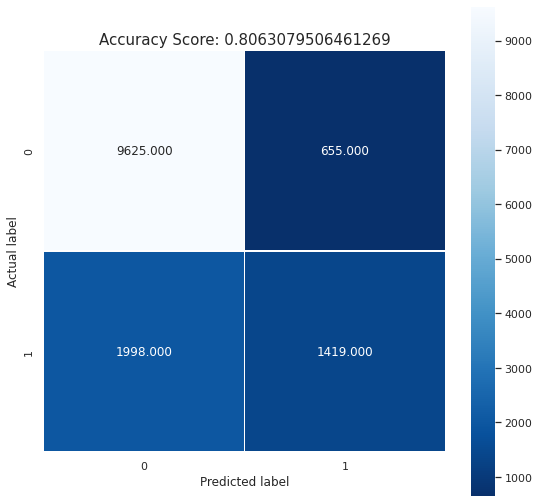

In [ ]:
#Confusion Matrix
print(plot_confusion_matrix(XG_cat_dum[2],XG_cat_dum[0]))
print(plot_confusion_matrix(XG_nocat_dum[2],XG_nocat_dum[0]))
print(plot_confusion_matrix(XG_cat_targ[2],XG_cat_targ[0]))
print(plot_confusion_matrix(XG_nocat_targ[2],XG_nocat_targ[0]))
print(plot_confusion_matrix(XG_under_cat_dum[2],XG_under_cat_dum[0]))
print(plot_confusion_matrix(XG_under_nocat_dum[2],XG_under_nocat_dum[0]))
print(plot_confusion_matrix(XG_under_cat_targ[2],XG_under_cat_targ[0]))
print(plot_confusion_matrix(XG_under_nocat_targ[2],XG_under_nocat_targ[0]))
print(plot_confusion_matrix(XG_under_norm_dum[2],XG_under_norm_dum[0]))
print(plot_confusion_matrix(XG_under_norm_targ[2],XG_under_norm_targ[0]))
print(plot_confusion_matrix(XG_norm_dum[2],XG_norm_dum[0]))
print(plot_confusion_matrix(XG_norm_targ[2],XG_norm_targ[0]))


#### Tuning hyperparameters

The available hyperopt optimization algorithms are -

hp.choice(label, options) — Returns one of the options, which should be a list or tuple.

hp.randint(label, upper) — Returns a random integer between the range [0, upper).

hp.uniform(label, low, high) — Returns a value uniformly between low and high.

hp.quniform(label, low, high, q) — Returns a value round(uniform(low, high) / q) * q, i.e it rounds the decimal values and returns an integer.

hp.normal(label, mean, std) — Returns a real value that’s normally-distributed with mean and standard deviation sigma.

In [ ]:
space={ #General Parameters
                'booster': 'gbtree', #default gbtree
                'verbosity': 0, #default 1. Verbosity of printing messages. Valid values are 0 (silent), 1 (warning), 2 (info), 3 (debug).
        #Parameters for Tree Booster
                'eta': 0.3, #default 0.3. Step size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get the weights of new features, and eta shrinks the feature weights to make the boosting process more conservative.
                'gamma': hp.uniform('gamma', 0, 10), #default 0. Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
                'max_depth': hp.uniform('max_depth', 2, 6), #default 6. Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit. 0 indicates no limit on depth. Beware that XGBoost aggressively consumes memory when training a deep tree. exact tree method requires non-zero value.
                'min_child_weight': hp.uniform('min_child_weight', 1, 5), #default 1. Minimum sum of instance weight (hessian) needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning. In linear regression task, this simply corresponds to minimum number of instances needed to be in each node. The larger min_child_weight is, the more conservative the algorithm will be.
                'max_delta_step': hp.uniform('max_delta_step', 0, 3), #default 0. Maximum delta step we allow each leaf output to be. If the value is set to 0, it means there is no constraint. If it is set to a positive value, it can help making the update step more conservative. Usually this parameter is not needed, but it might help in logistic regression when class is extremely imbalanced. Set it to value of 1-10 might help control the update.
                'subsample': hp.uniform('subsample', 0.5, 1), #default 1. Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting. Subsampling will occur once in every boosting iteration.
                'lambda': hp.uniform('lambda', 1, 2), #default 1. L2 regularization term on weights. Increasing this value will make model more conservative.
                'alpha': hp.uniform('alpha', 0, 1), #default 0. L1 regularization term on weights. Increasing this value will make model more conservative.
                'tree_method': 'auto', #default auto. The tree construction algorithm used in XGBoost. Use heuristic to choose the fastest method. For small dataset, exact greedy (exact) will be used. For larger dataset, approximate algorithm (approx) will be chosen. It’s recommended to try hist and gpu_hist for higher performance with large dataset. (gpu_hist)has support for external memory. exact: Exact greedy algorithm. Enumerates all split candidates. approx: Approximate greedy algorithm using quantile sketch and gradient histogram. hist: Faster histogram optimized approximate greedy algorithm. gpu_hist: GPU implementation of hist algorithm.
                'scale_pos_weight': 1, #default 1. Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative instances) / sum(positive instances)
                'num_parallel_tree': hp.uniform('num_parallel_tree', 1, 2), #default 1. Number of parallel trees constructed during each iteration. This option is used to support boosted random forest.
        #Learning Task Parameters
                'objective': 'binary:logistic', 
                'seed': 123 #default 0. Random number seed. This parameter is ignored in R package, use set.seed() instead.
                }

In [ ]:
def objective(space):
    clf=xgb.XGBClassifier(
                booster = space['booster'],
                verbosity = 0,
                eta = 0.3,
                gamma = int(space['gamma']),
                max_depth = int(space['max_depth']),
                min_child_weight = int(space['min_child_weight']),
                max_delta_step = int(space['max_delta_step']),
                subsample = float(space['subsample']),
                alpha = int(space['alpha']),
                num_parallel_tree = int(space['num_parallel_tree']),
                objective = 'binary:logistic',
                seed = 123)
    
    evaluation = [( X11_learn, y11_learn), ( X11_val, y11_val)] #Dataset 11 has the best accuracy 
    
    clf.fit(X11_learn, y11_learn,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X11_val)
    accuracy = accuracy_score(y11_val, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:
0.8390370545197073
SCORE:
0.8392730705687986
SCORE:
0.839155062544253
SCORE:
0.8400991267406184
SCORE:
0.8392730705687986
SCORE:
0.8329006372433325
SCORE:
0.838801038470616
SCORE:
0.8405711588388011
SCORE:
0.8412792069860751
SCORE:
0.8321925890960585
SCORE:
0.8434033514278971
SCORE:
0.8339627094642436
SCORE:
0.8417512390842578
SCORE:
0.8424592872315317
SCORE:
0.8404531508142554
SCORE:
0.8423412792069861
SCORE:
0.838447014396979
SCORE:
0.838447014396979
SCORE:
0.840217134765164
SCORE:
0.8378569742742507
SCORE:
0.8436393674769884
SCORE:
0.8418692471088034
SCORE:
0.8443474156242624
SCORE:
0.8430493273542601
SCORE:
0.8421052631578947
SCORE:
0.8442294075997168
SCORE:
0.8434033514278971
SCORE:
0.8346707576115175
SCORE:
0.8416332310597121
SCORE:
0.8415152230351663
SCORE:
0.8437573755015341
SCORE:
0.8410431909369838
SCORE:
0.8428133113051688
SCORE:
0.8390370545197073
SCORE:
0.8428133113051688
SCORE:
0.8416332310597121
SCORE:
0.8416332310597121
SCORE:
0.8418692471088034
SCORE:
0.83443474

In [ ]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'alpha': 0.42305995442535216, 'gamma': 2.976438296372673, 'lambda': 1.5658979154848425, 'max_delta_step': 0.2960480999543583, 'max_depth': 5.899029332539476, 'min_child_weight': 4.134016442280089, 'num_parallel_tree': 1.4100010701734822, 'subsample': 0.652427058319988}


In [ ]:
def XG(X_learn,y_learn,X_val,y_val):
  X_learn_mat=xgb.DMatrix(X_learn, label=y_learn)
  X_val_mat = xgb.DMatrix(X_val, label=y_val)
  parameters = {"booster": "gbtree", 
                'alpha': round(0.42305995442535216),
                'gamma': round(2.976438296372673),
                "max_depth": round(5.899029332539476), 
                "eta": 0.3, 
                'lambda': round(1.5658979154848425),
                'max_delta_step': round(0.2960480999543583),
                'min_child_weight': round(4.134016442280089),
                'num_parallel_tree': round(1.4100010701734822),
                "objective": "binary:logistic", 
                'subsample': round(0.652427058319988),
                "nthread":2}
  rounds = 20
  validation = [(X_val_mat, "val"), (X_learn_mat, "train")]
  XGBoost=xgb.train(parameters, X_learn_mat, rounds, validation)
  pred=XGBoost.predict(X_val_mat)
  y_pred= [1 if i > .5 else 0 for i in pred]
  return sklearn.metrics.accuracy_score(y_val, y_pred, normalize=True, sample_weight=None),classification_report(y_val, y_pred),confusion_matrix(y_val, y_pred)


In [ ]:
#XG for the two best model
XG_nocat_dum=XG(X2_learn,y2_learn,X2_val,y2_val)
XG_norm_dum=XG(X11_learn,y11_learn,X11_val,y11_val)

[0]	val-error:0.175006	train-error:0.168286
[1]	val-error:0.173472	train-error:0.166555
[2]	val-error:0.169578	train-error:0.162897
[3]	val-error:0.167807	train-error:0.162071
[4]	val-error:0.165683	train-error:0.160773
[5]	val-error:0.164857	train-error:0.158373
[6]	val-error:0.162851	train-error:0.156642
[7]	val-error:0.162379	train-error:0.155737
[8]	val-error:0.161907	train-error:0.154833
[9]	val-error:0.161199	train-error:0.153967
[10]	val-error:0.161907	train-error:0.153731
[11]	val-error:0.161553	train-error:0.152708
[12]	val-error:0.160255	train-error:0.152118
[13]	val-error:0.160845	train-error:0.151332
[14]	val-error:0.160137	train-error:0.150309
[15]	val-error:0.159311	train-error:0.149758
[16]	val-error:0.159075	train-error:0.149483
[17]	val-error:0.158249	train-error:0.148775
[18]	val-error:0.157541	train-error:0.148735
[19]	val-error:0.157187	train-error:0.148578
[0]	val-error:0.175006	train-error:0.168286
[1]	val-error:0.173472	train-error:0.166555
[2]	val-error:0.169578

In [ ]:
#Accuracy scores for each model
accuracy_XG_nocat_dum=XG_nocat_dum[0]
accuracy_XG_norm_dum=XG_norm_dum[0]

In [ ]:
#Dataframe of accuracy for XGBOOST with optimised parameters
XG_data = {'data':  ['nocat_dum', 'norm_dum'],
        'accuracy': [accuracy_XG_nocat_dum,accuracy_XG_norm_dum]
        }

XG_accuracy = pd.DataFrame(XG_data)

XG_accuracy


,data,accuracy
0,nocat_dum,0.842813
1,norm_dum,0.842813


XG_nocat_dum
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      6302
           1       0.75      0.57      0.65      2172

    accuracy                           0.84      8474
   macro avg       0.81      0.75      0.78      8474
weighted avg       0.84      0.84      0.84      8474

None
XG_norm_dum
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      6302
           1       0.75      0.57      0.65      2172

    accuracy                           0.84      8474
   macro avg       0.81      0.75      0.78      8474
weighted avg       0.84      0.84      0.84      8474

None


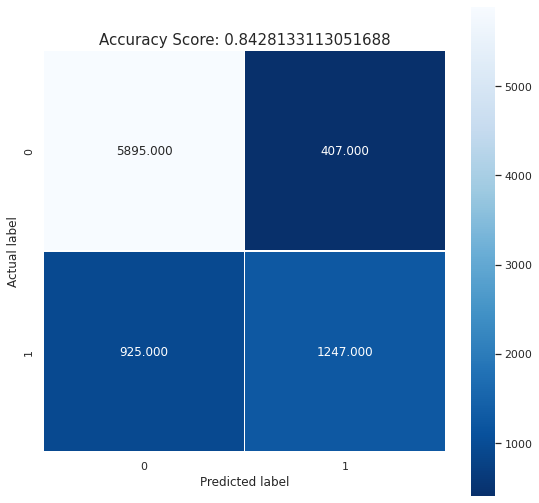

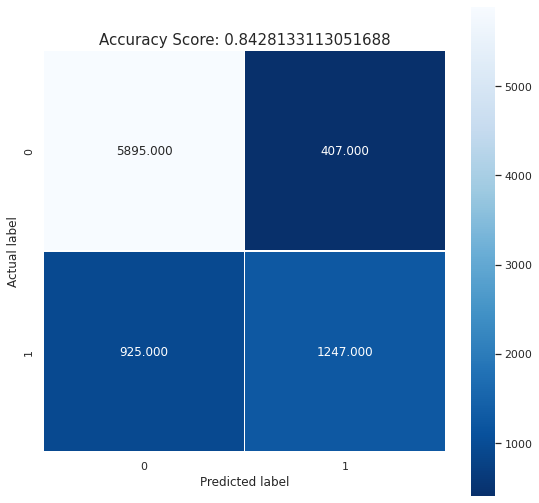

In [ ]:
print('XG_nocat_dum')
print(XG_nocat_dum[1])
print(plot_confusion_matrix(XG_nocat_dum[2],XG_nocat_dum[0]))
print('XG_norm_dum')
print(XG_norm_dum[1])
print(plot_confusion_matrix(XG_norm_dum[2],XG_norm_dum[0]))

## Comparing all models

When executing the machine learning models, our first approach was to set basic parameters to have a general idea of which models could work and on which datasets. We obtain the following results sum up in one table.

In [ ]:
# Sum up of accuracy for all models
Models=LR_accuracy['data']
LogisticRegression=LR_accuracy['accuracy']
Gaussian=Gaus_accuracy['accuracy']
SVM=SVM_accuracy['accuracy']
RandomForest=Forest_accuracy['accuracy']
XGBOOST=XG_accuracy['accuracy']

frame = { 'Datasets': Models, 'LogisticRegression': LogisticRegression, 'Gaussian': Gaussian, 'SVM': SVM, 'RandomForest': RandomForest, 'XGBoost':XGBOOST }
df_accuracy = pd.DataFrame(frame)
df_accuracy

,Datasets,LogisticRegression,Gaussian,SVM,RandomForest,XGBoost
0,cat_dum,0.822398,0.739438,0.819212,0.811423,0.822516
1,nocat_dum,0.832075,0.746991,0.744395,0.821336,0.840807
2,cat_targ,0.773235,0.736366,0.772213,0.759071,0.770096
3,nocat_targ,0.778346,0.769001,0.757903,0.782653,0.806308
4,under_cat_dum,0.788722,0.750892,0.793243,0.778492,0.794908
5,under_nocat_dum,0.801332,0.764216,0.542708,0.784916,0.811087
6,under_cat_targ,0.680873,0.667748,0.680726,0.661407,0.692818
7,under_nocat_targ,0.724377,0.709187,0.547707,0.722607,0.767143
8,under_norm_dum,0.802522,0.765168,0.542232,0.787533,0.811087
9,under_norm_targ,0.728949,0.715971,0.547559,0.720985,0.767143


With this first approach, it seems that the best model was obtained with XGBoost for the two datasets: without undersampling, but with normalization and dummies encoder and without categories and with dummies encoder. <br> However, it is not our final choice. Indeed, we decided to go further by applying Grid Search to find the best parameters for the machine learning models (as some results are very tight, changing one parameter could completely change the conclusion). Finally, XGBoost was still the best machine learning model when applying it on the fourth and eleventh datasets (same as before).
So, we apply XGBoost to these datasets and do the prediction on y_test by fitting with X_train and y_train.

In [ ]:
#Prediction on y_test with the best model
X11_train_mat=xgb.DMatrix(X11_train, label=y11_train)
X11_test_mat = xgb.DMatrix(X11_test, label=y11_test)
parameters = {"booster": "gbtree", 
              'alpha': round(0.42305995442535216),
              'gamma': round(2.976438296372673),
              "max_depth": round(5.899029332539476), 
              "eta": 0.3, 
              'lambda': round(1.5658979154848425),
              'max_delta_step': round(0.2960480999543583),
              'min_child_weight': round(4.134016442280089),
              'num_parallel_tree': round(1.4100010701734822),
              "objective": "binary:logistic", 
              'subsample': round(0.652427058319988),
              "nthread":2}
rounds = 20
validation = [(X11_test_mat, "test"), (X11_train_mat, "train")]
XGBoost=xgb.train(parameters, X11_train_mat, rounds, validation)
pred=XGBoost.predict(X11_test_mat)
y_pred= [1 if i > .5 else 0 for i in pred]

[0]	test-error:0.177715	train-error:0.168815
[1]	test-error:0.175591	train-error:0.164833
[2]	test-error:0.17444	train-error:0.162885
[3]	test-error:0.169661	train-error:0.160584
[4]	test-error:0.170281	train-error:0.159404
[5]	test-error:0.168776	train-error:0.158017
[6]	test-error:0.167448	train-error:0.156542
[7]	test-error:0.165767	train-error:0.155716
[8]	test-error:0.164882	train-error:0.155657
[9]	test-error:0.163997	train-error:0.155303
[10]	test-error:0.163023	train-error:0.154448
[11]	test-error:0.161873	train-error:0.154005
[12]	test-error:0.161873	train-error:0.153208
[13]	test-error:0.162492	train-error:0.151763
[14]	test-error:0.161607	train-error:0.151409
[15]	test-error:0.161961	train-error:0.150052
[16]	test-error:0.161519	train-error:0.150022
[17]	test-error:0.16028	train-error:0.148931
[18]	test-error:0.160545	train-error:0.14896
[19]	test-error:0.160191	train-error:0.149167


In [ ]:
sklearn.metrics.accuracy_score(y11_test, y_pred, normalize=True, sample_weight=None)

0.8398088326400567

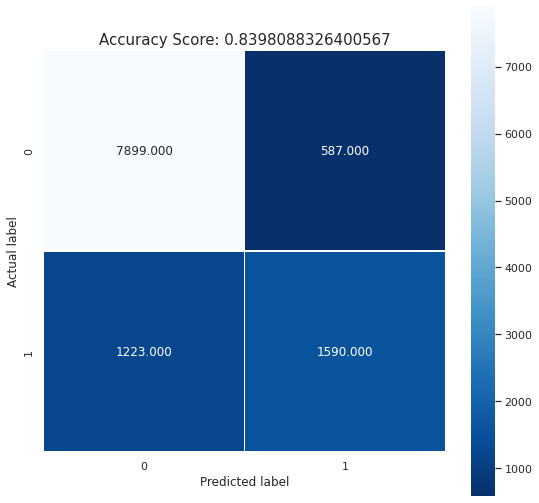

In [ ]:
plot_confusion_matrix(confusion_matrix(y11_test, y_pred), sklearn.metrics.accuracy_score(y11_test, y_pred, normalize=True, sample_weight=None))

We obtained an accuracy score close to the one computed in the XGBoost grid search part.